## Challenge 2

Protestas sociales:  _*Organizado por provincia*_

#### *Importamos el mapa del Perú*
Dividido por provincias

In [1]:
import os, geopandas as gpd

provincias=gpd.read_file(os.path.join("data","provincias_inei_23"))

In [2]:
provincias

,OBJECTID,CCDD,CCPP,DEPARTAMEN,PROVINCIA,geometry
0,1.0,01,01,AMAZONAS,CHACHAPOYAS,"POLYGON ((-77.72614 -5.94354, -77.72486 -5.943..."
1,2.0,01,02,AMAZONAS,BAGUA,"POLYGON ((-78.61909 -4.51001, -78.61802 -4.510..."
2,3.0,01,03,AMAZONAS,BONGARA,"POLYGON ((-77.72759 -5.1403, -77.72361 -5.1406..."
3,4.0,01,04,AMAZONAS,CONDORCANQUI,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
4,5.0,01,05,AMAZONAS,LUYA,"POLYGON ((-78.13023 -5.9037, -78.13011 -5.9041..."
...,...,...,...,...,...,...
191,192.0,24,03,TUMBES,ZARUMILLA,"POLYGON ((-80.28521 -3.41276, -80.28406 -3.412..."
192,193.0,25,01,UCAYALI,CORONEL PORTILLO,"POLYGON ((-74.47145 -7.27617, -74.47052 -7.277..."
193,194.0,25,02,UCAYALI,ATALAYA,"POLYGON ((-73.18146 -9.41174, -73.13475 -9.411..."
194,195.0,25,03,UCAYALI,PADRE ABAD,"POLYGON ((-75.43663 -8.22999, -75.43651 -8.230..."


<Axes: >

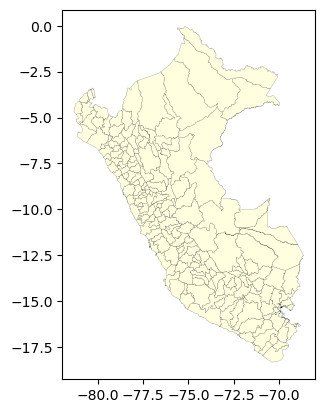

In [3]:
provincias.plot(facecolor="lightyellow",
               edgecolor='black',
               linewidth=0.1)

#### *Importamos la base de datos de protestas (2000 - 2023)*

In [4]:
import pandas as pd

csv_path = os.path.join("data","protesta00_23.csv")
protesta = pd.read_csv(csv_path)
protesta.head()

,Provincia,Provincia_id,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Lima,1501,315,367,434,214,192,217,75,232,...,278,155,139,143,127,128,88,248,287,249
1,Cusco,801,26,10,24,11,10,23,8,16,...,16,10,7,25,12,10,4,15,39,29
2,Huancavelica,901,5,1,7,6,5,3,4,11,...,3,3,1,5,1,0,0,3,5,4
3,Tumbes,2401,9,9,16,5,3,18,3,11,...,6,3,0,0,1,2,0,2,2,3
4,Piura,2001,23,14,22,14,3,15,4,19,...,11,5,1,13,7,6,1,9,24,14


In [5]:
protesta['Provincia']=protesta.Provincia.str.upper()
protesta.head()

,Provincia,Provincia_id,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,LIMA,1501,315,367,434,214,192,217,75,232,...,278,155,139,143,127,128,88,248,287,249
1,CUSCO,801,26,10,24,11,10,23,8,16,...,16,10,7,25,12,10,4,15,39,29
2,HUANCAVELICA,901,5,1,7,6,5,3,4,11,...,3,3,1,5,1,0,0,3,5,4
3,TUMBES,2401,9,9,16,5,3,18,3,11,...,6,3,0,0,1,2,0,2,2,3
4,PIURA,2001,23,14,22,14,3,15,4,19,...,11,5,1,13,7,6,1,9,24,14


#### Verificamos si hay nombres diferentes en ambas datas

In [6]:
onlyProtest=set(protesta.Provincia)- set(provincias.PROVINCIA)
onlyMap=set(provincias.PROVINCIA)- set(protesta.Provincia)

In [7]:
onlyProtest

{'NAZCA'}

In [8]:
onlyMap

{'AIJA',
 'ANTONIO RAYMONDI',
 'ASUNCION',
 'BOLIVAR',
 'CARLOS FERMIN FITZCARRALD',
 'CORONGO',
 'JULCAN',
 'LA UNION',
 'NASCA',
 'RODRIGUEZ DE MENDOZA',
 'SAN MARCOS',
 'SAN PABLO'}

In [9]:
import warnings
warnings.filterwarnings("ignore")

provincias.PROVINCIA.replace({'NASCA': 'NAZCA'},inplace=True)

onlyProtest=set(protesta.Provincia)- set(provincias.PROVINCIA)
onlyMap=set(provincias.PROVINCIA)- set(protesta.Provincia)

[(provincia, process.extractOne(str(provincia), map(str, onlyMap))) for provincia in sorted(onlyProtest)]

[]

In [10]:
theMapAndData=provincias.merge(protesta,left_on='PROVINCIA', right_on='Provincia')
# nuevo mapa
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      185 non-null    float64 
 1   CCDD          185 non-null    object  
 2   CCPP          185 non-null    object  
 3   DEPARTAMEN    185 non-null    object  
 4   PROVINCIA     185 non-null    object  
 5   geometry      185 non-null    geometry
 6   Provincia     185 non-null    object  
 7   Provincia_id  185 non-null    int64   
 8   2000          185 non-null    int64   
 9   2001          185 non-null    int64   
 10  2002          185 non-null    int64   
 11  2003          185 non-null    int64   
 12  2004          185 non-null    int64   
 13  2005          185 non-null    int64   
 14  2006          185 non-null    int64   
 15  2007          185 non-null    int64   
 16  2008          185 non-null    int64   
 17  2009          185 non-null    int64   
 18  20

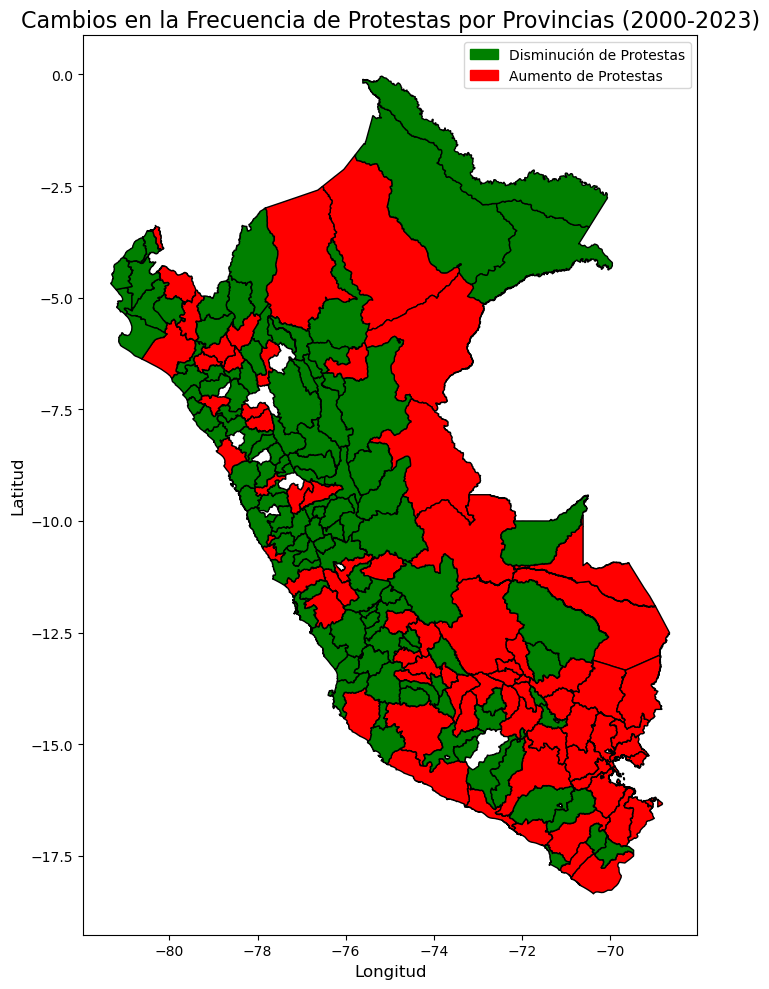

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
gdf = theMapAndData
gdf['change'] = gdf['2023'] - gdf['2000']
gdf['trend'] = gdf['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
colors = {'increase': 'red', 'decrease': 'green'}
fig, ax = plt.subplots(figsize=(12, 10))
gdf.assign(color=gdf['trend'].map(colors)).plot(ax=ax, color=gdf['trend'].map(colors), edgecolor='black')
plt.title('Cambios en la Frecuencia de Protestas por Provincias (2000-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
legend_elements = [
    patches.Patch(color='green', label='Disminución de Protestas'),
    patches.Patch(color='red', label='Aumento de Protestas')
]
plt.legend(handles=legend_elements, loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()

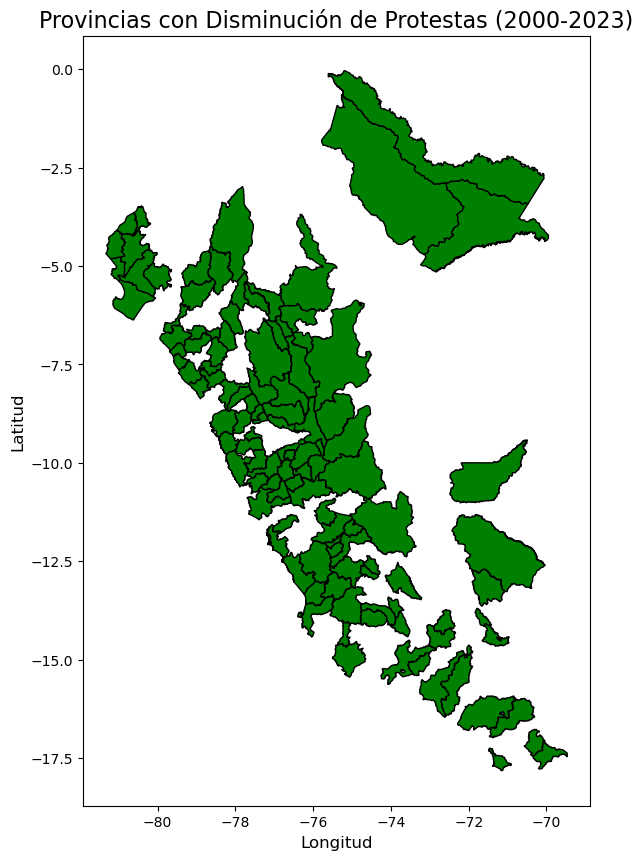

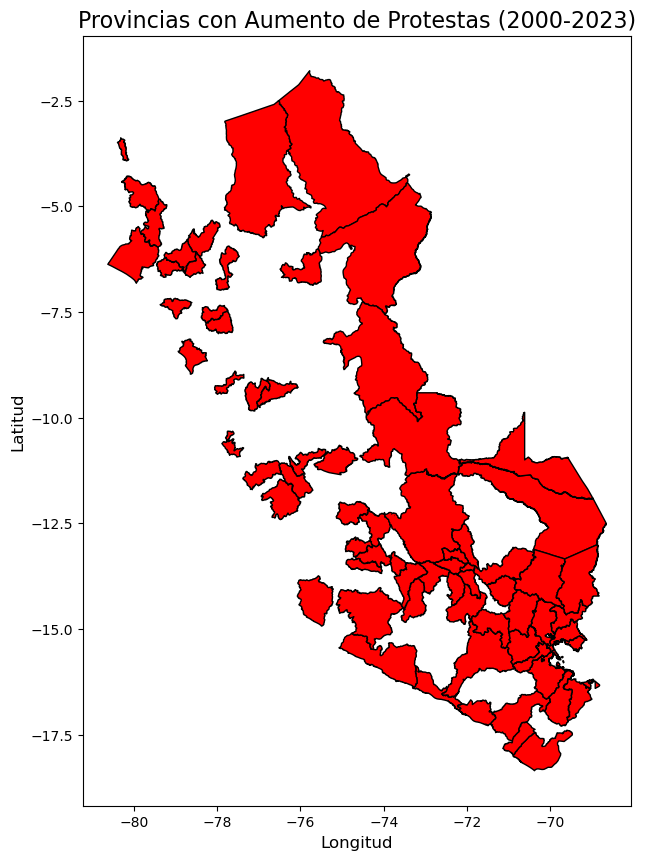

In [12]:
gdf = theMapAndData
#Provincias que disminuyeron las protestas
gdf['change'] = gdf['2023'] - gdf['2000']
gdf['trend'] = gdf['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
colors = {'increase': 'red', 'decrease': 'green'}
fig, ax = plt.subplots(figsize=(12, 10))
gdf_decrease = gdf[gdf['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='green', edgecolor='black')
plt.title('Provincias con Disminución de Protestas (2000-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

#Provincias que aumentaron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
gdf_increase = gdf[gdf['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='red', edgecolor='black')
plt.title('Provincias con Aumento de Protestas (2000-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

#### Y si añadimos también los límites de departamento...

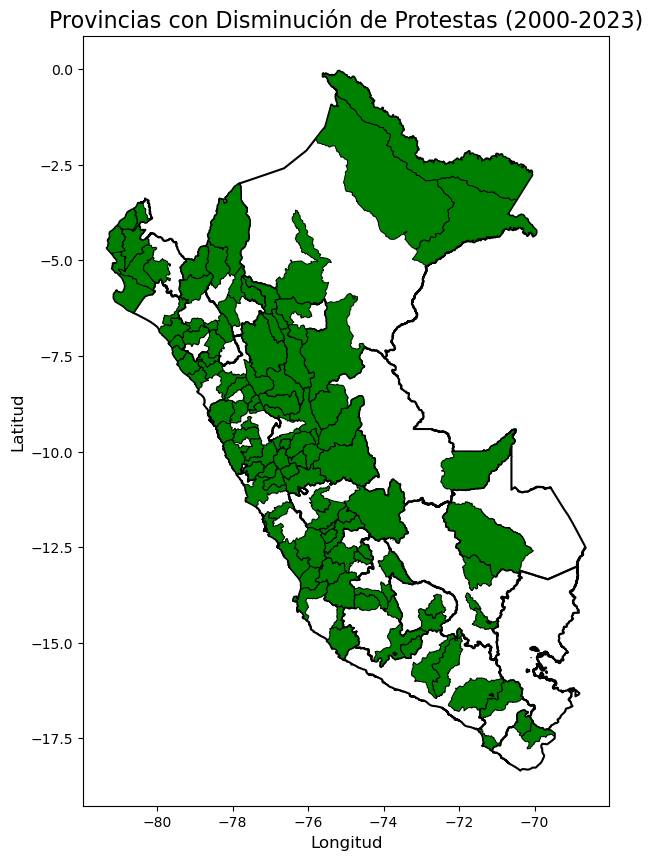

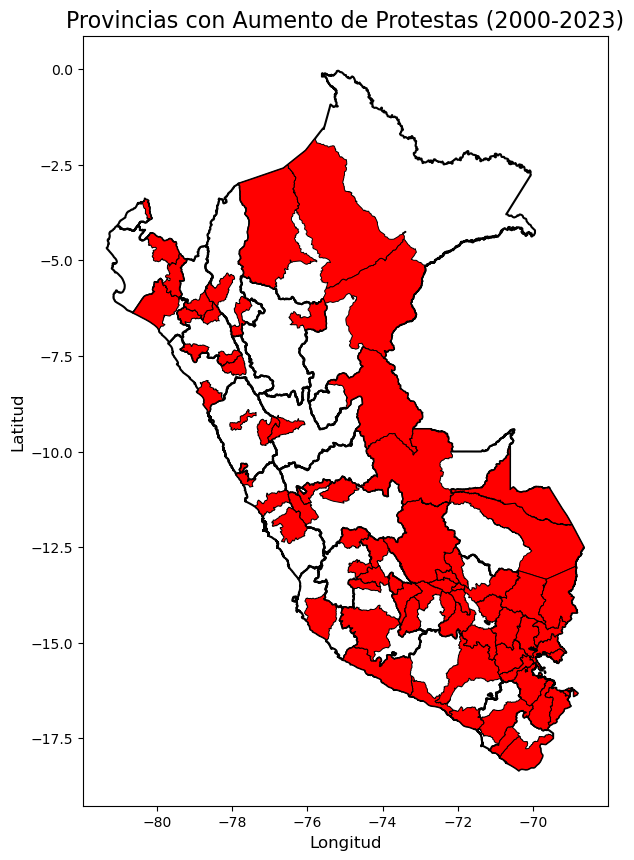

In [13]:
gdf_provincias = theMapAndData
gdf_departamentos = gpd.read_file(os.path.join("data", "departamentos_inei_23"))

gdf_provincias['change'] = gdf_provincias['2023'] - gdf_provincias['2000']
gdf_provincias['trend'] = gdf_provincias['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')

# Provincias que disminuyeron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
# Plotear el shapefile de los departamentos
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_decrease = gdf_provincias[gdf_provincias['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='green', edgecolor='black', linewidth=0.7)
plt.title('Provincias con Disminución de Protestas (2000-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

# Provincias que aumentaron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
# Plotear el shapefile de los departamentos
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_increase = gdf_provincias[gdf_provincias['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='red', edgecolor='black', linewidth=0.7)
plt.title('Provincias con Aumento de Protestas (2000-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

Pero... No estamos tomando en cuenta los demás años. 
#### Vemos la distribución de los valores por cada provincia 

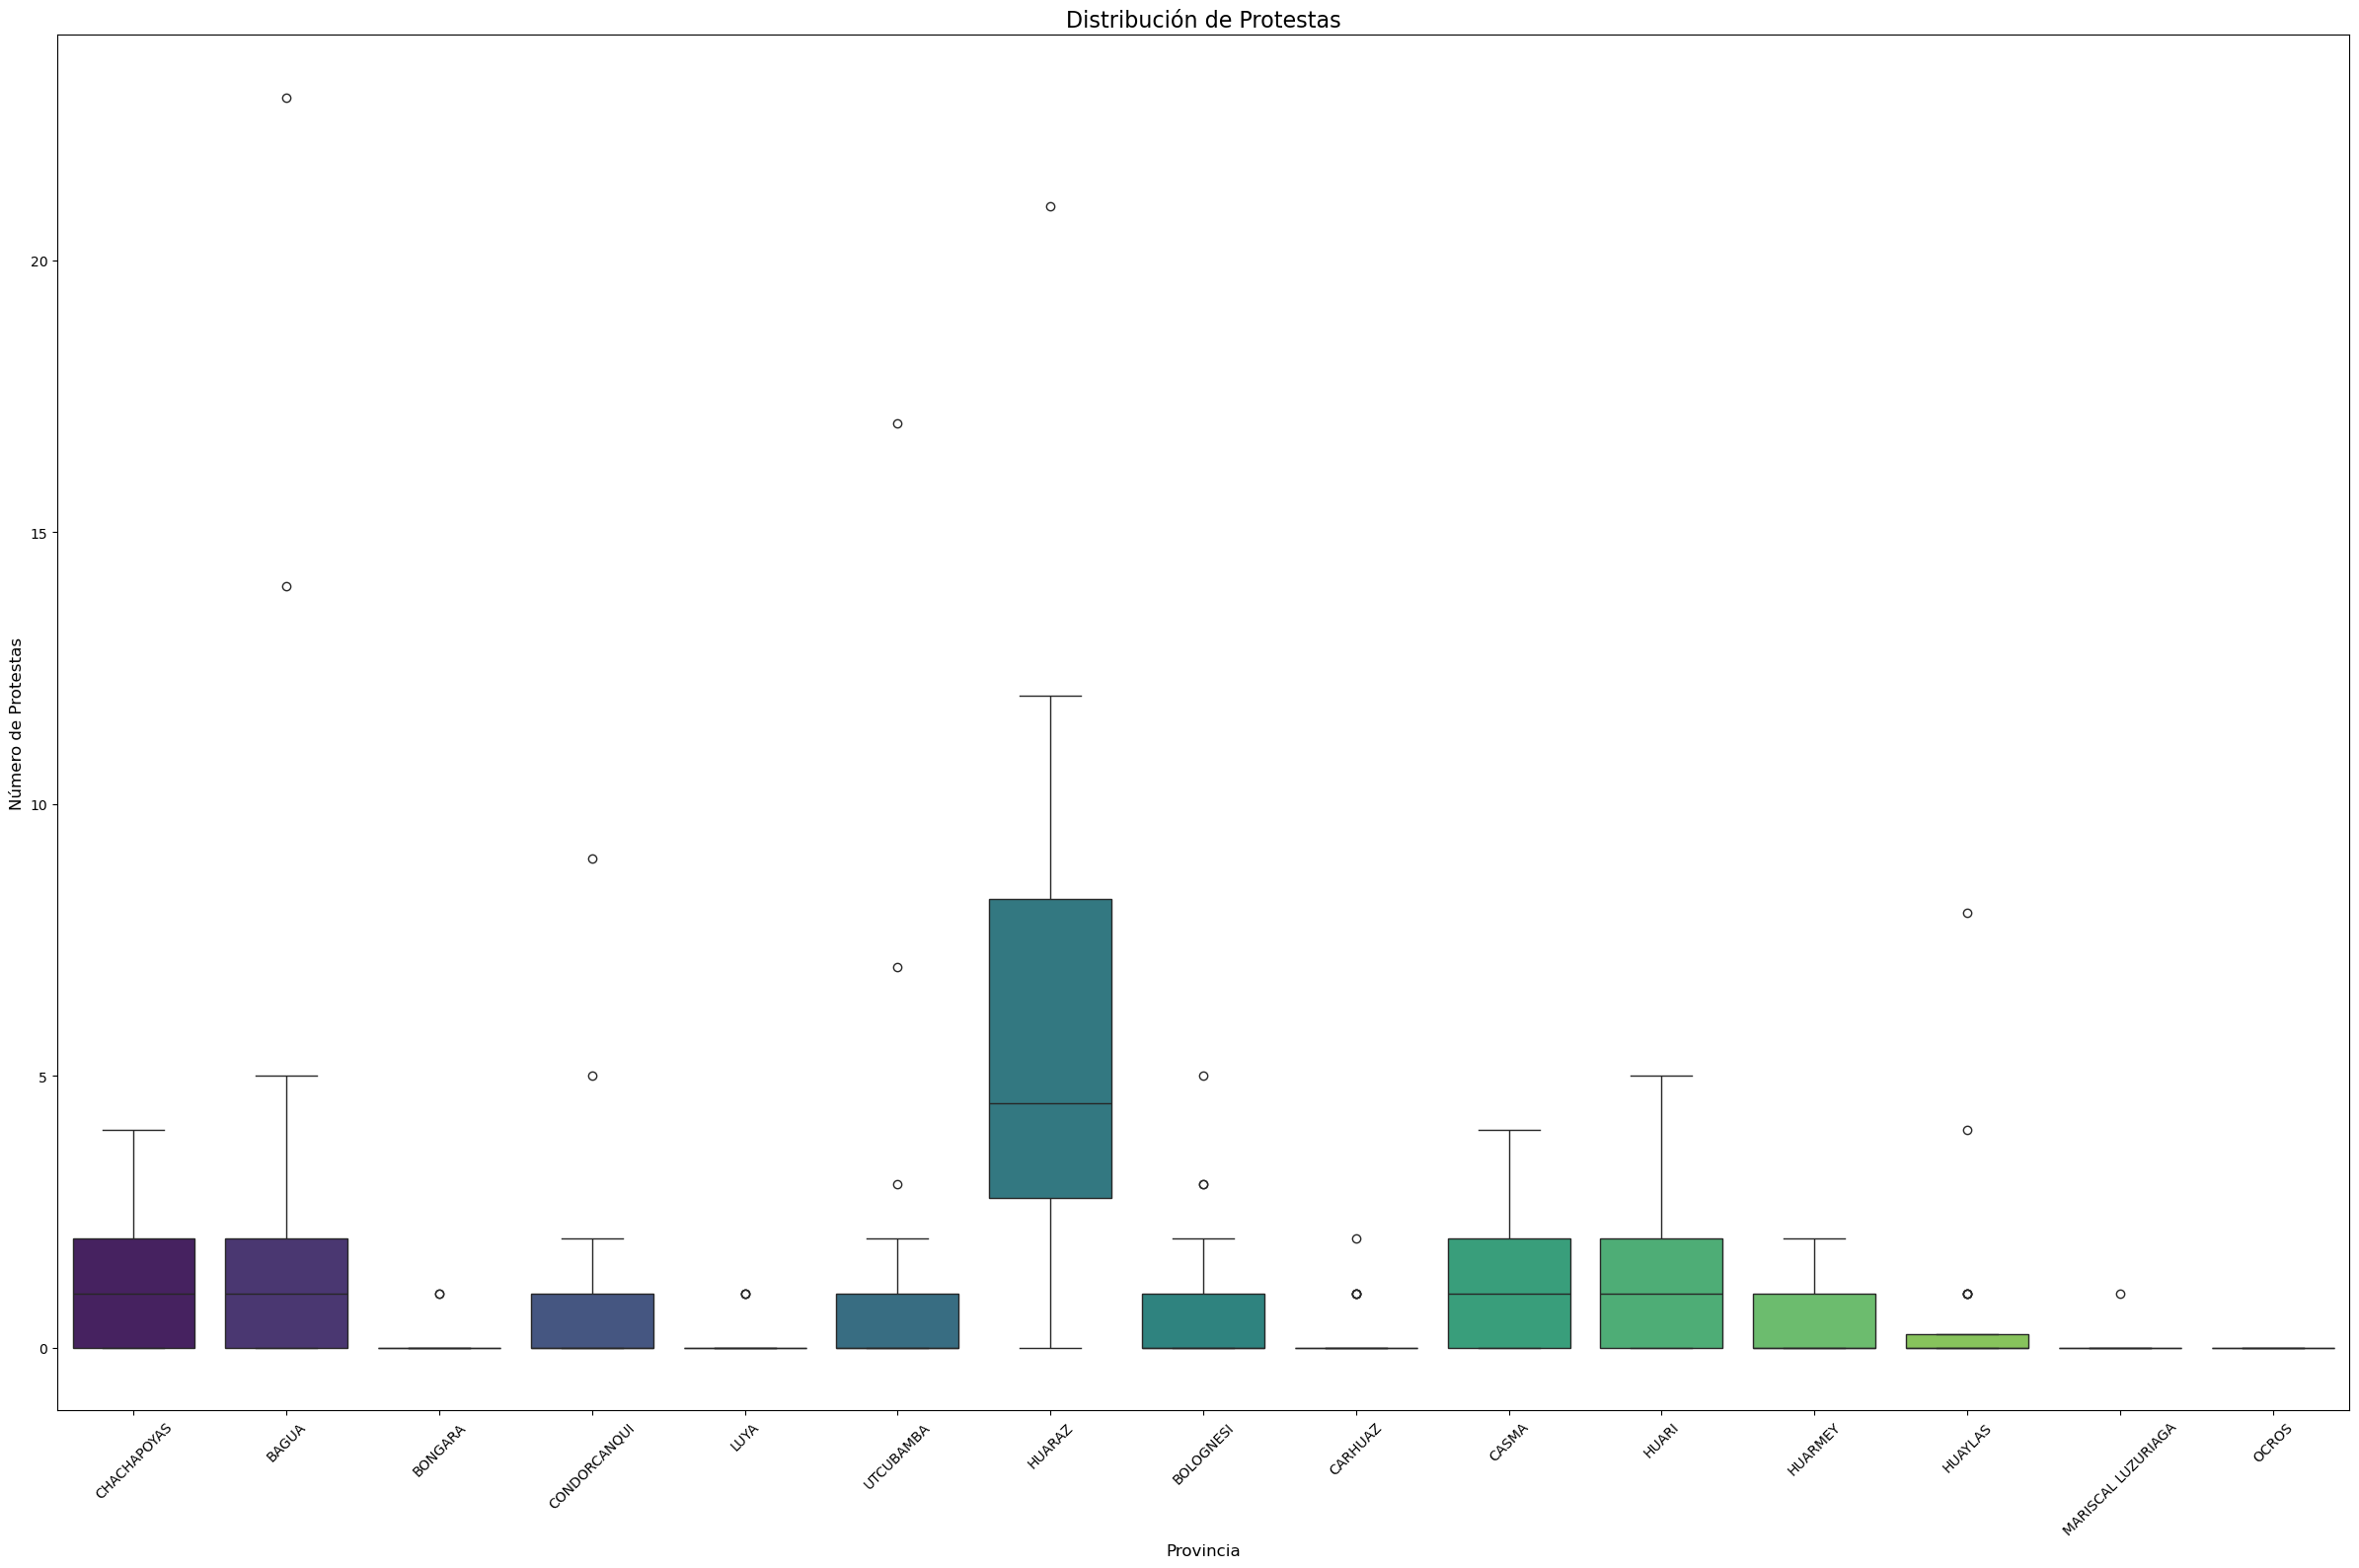

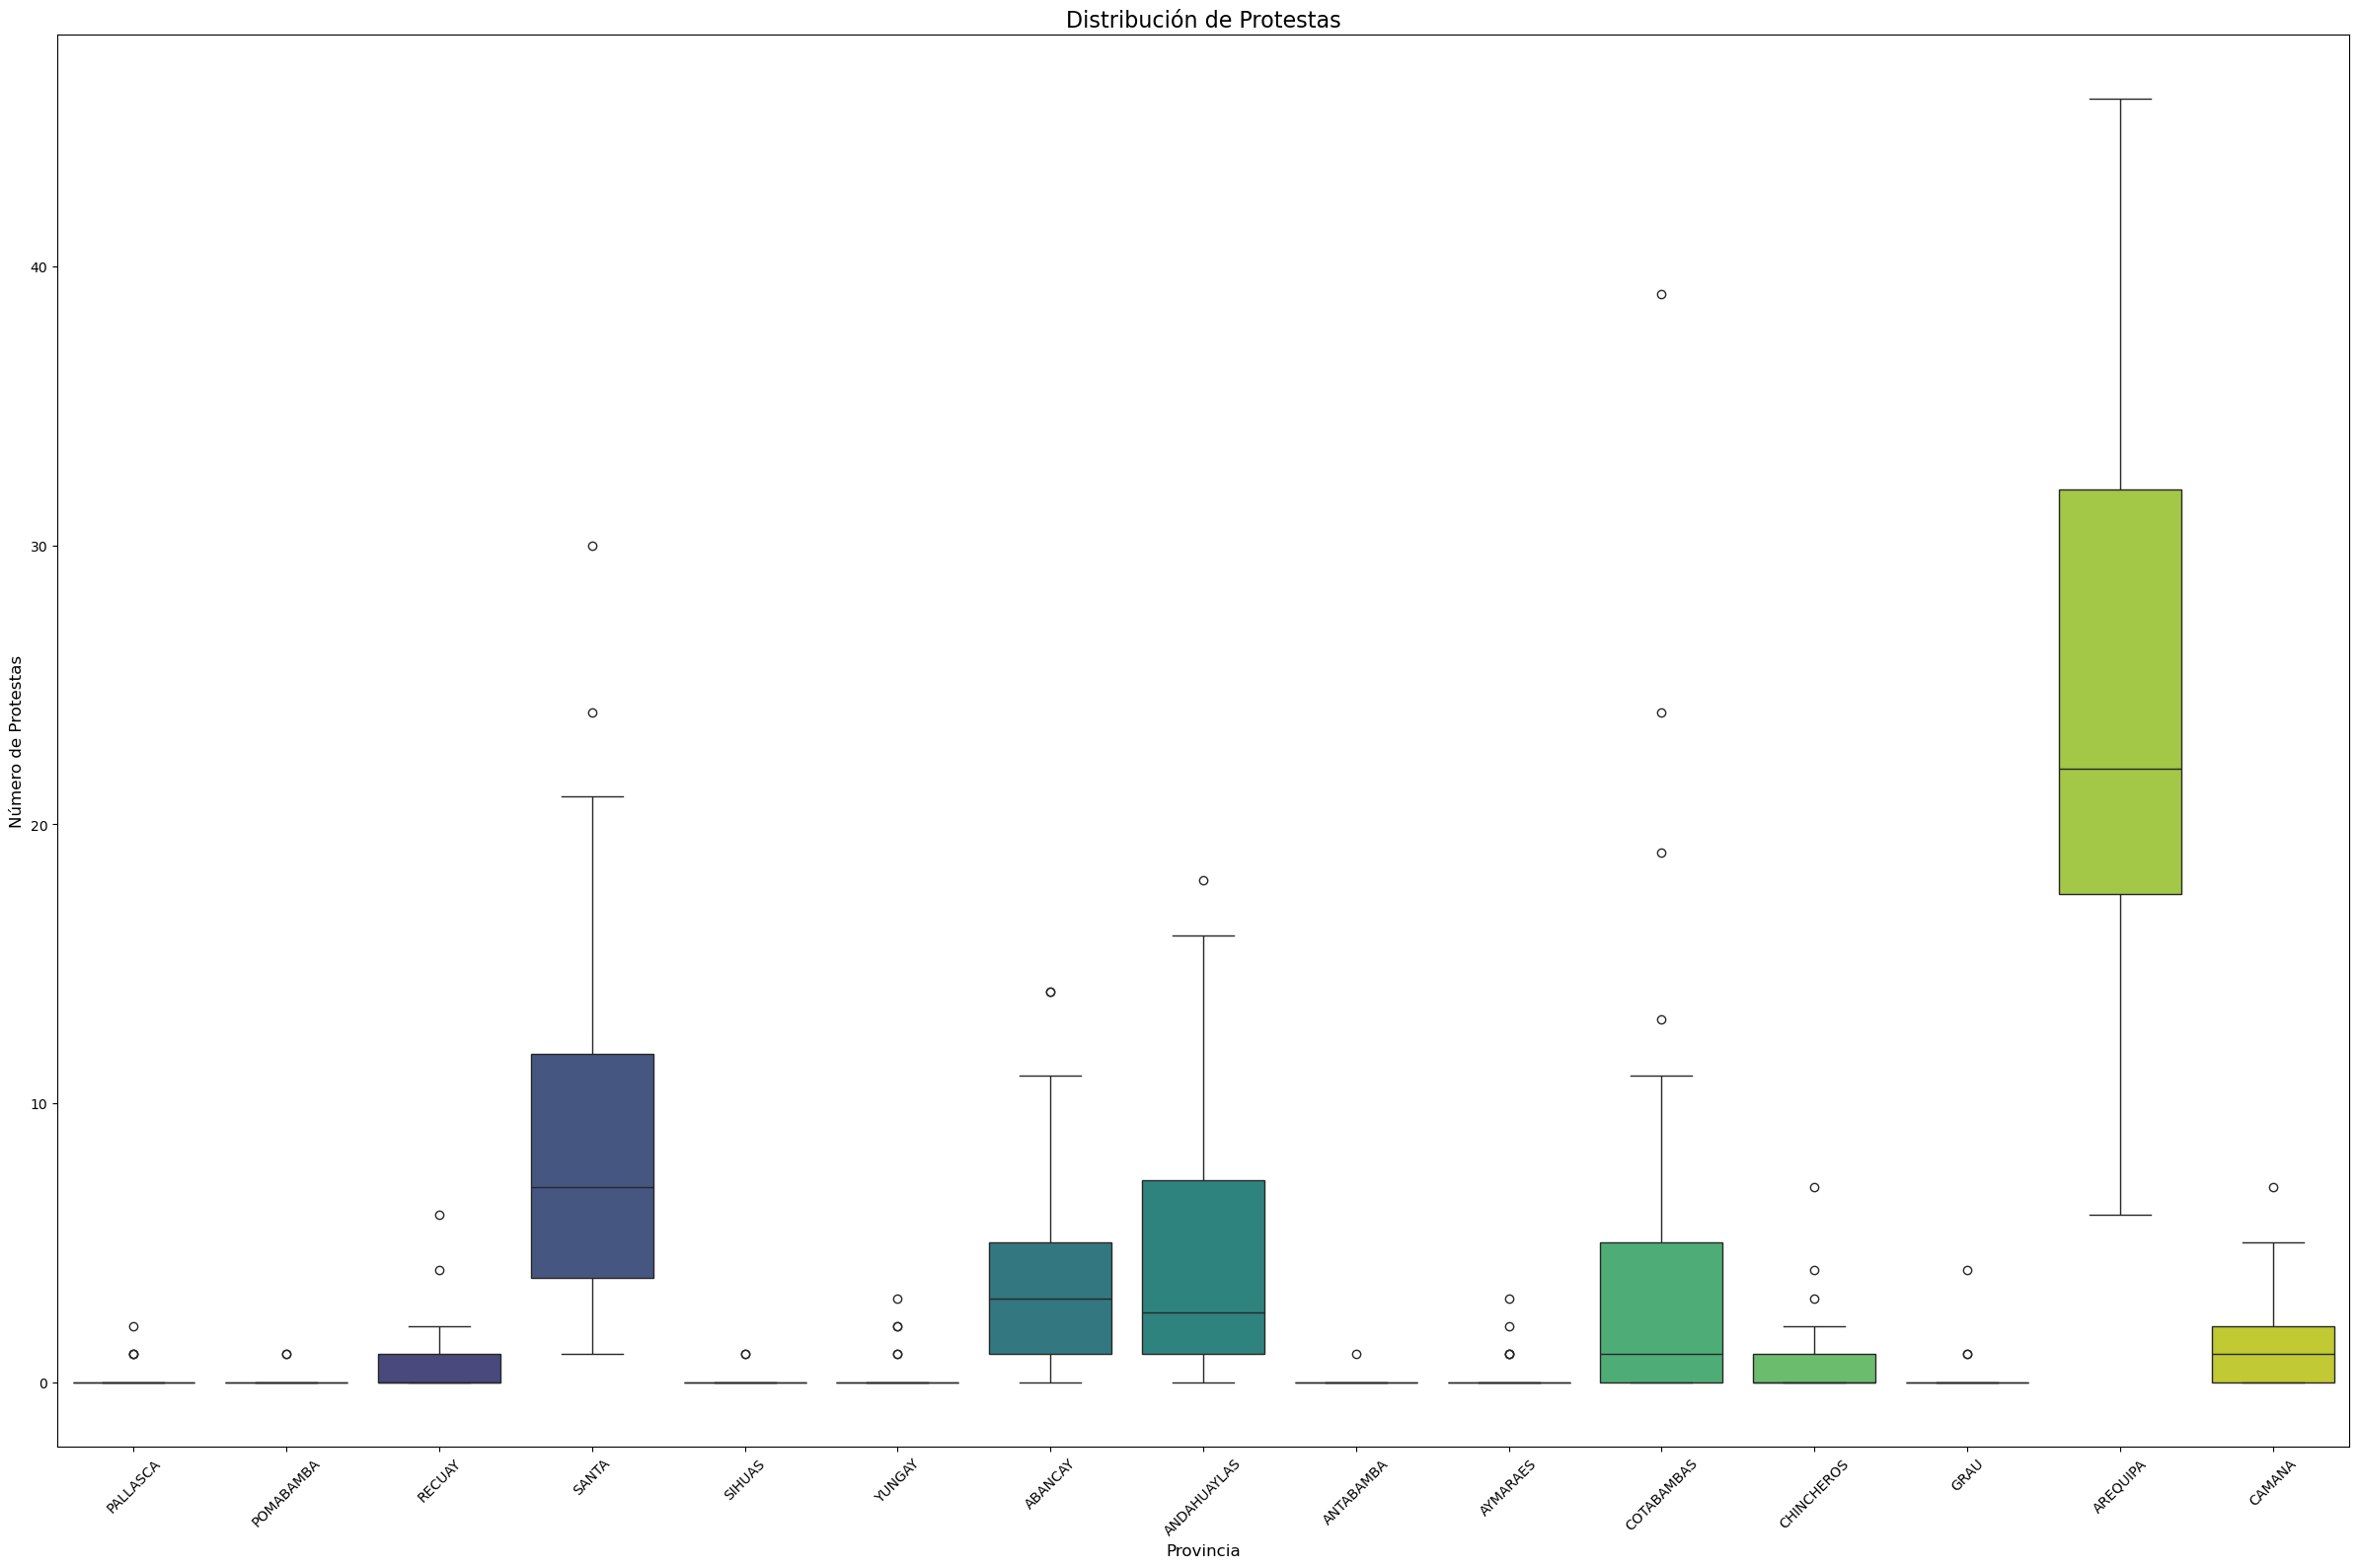

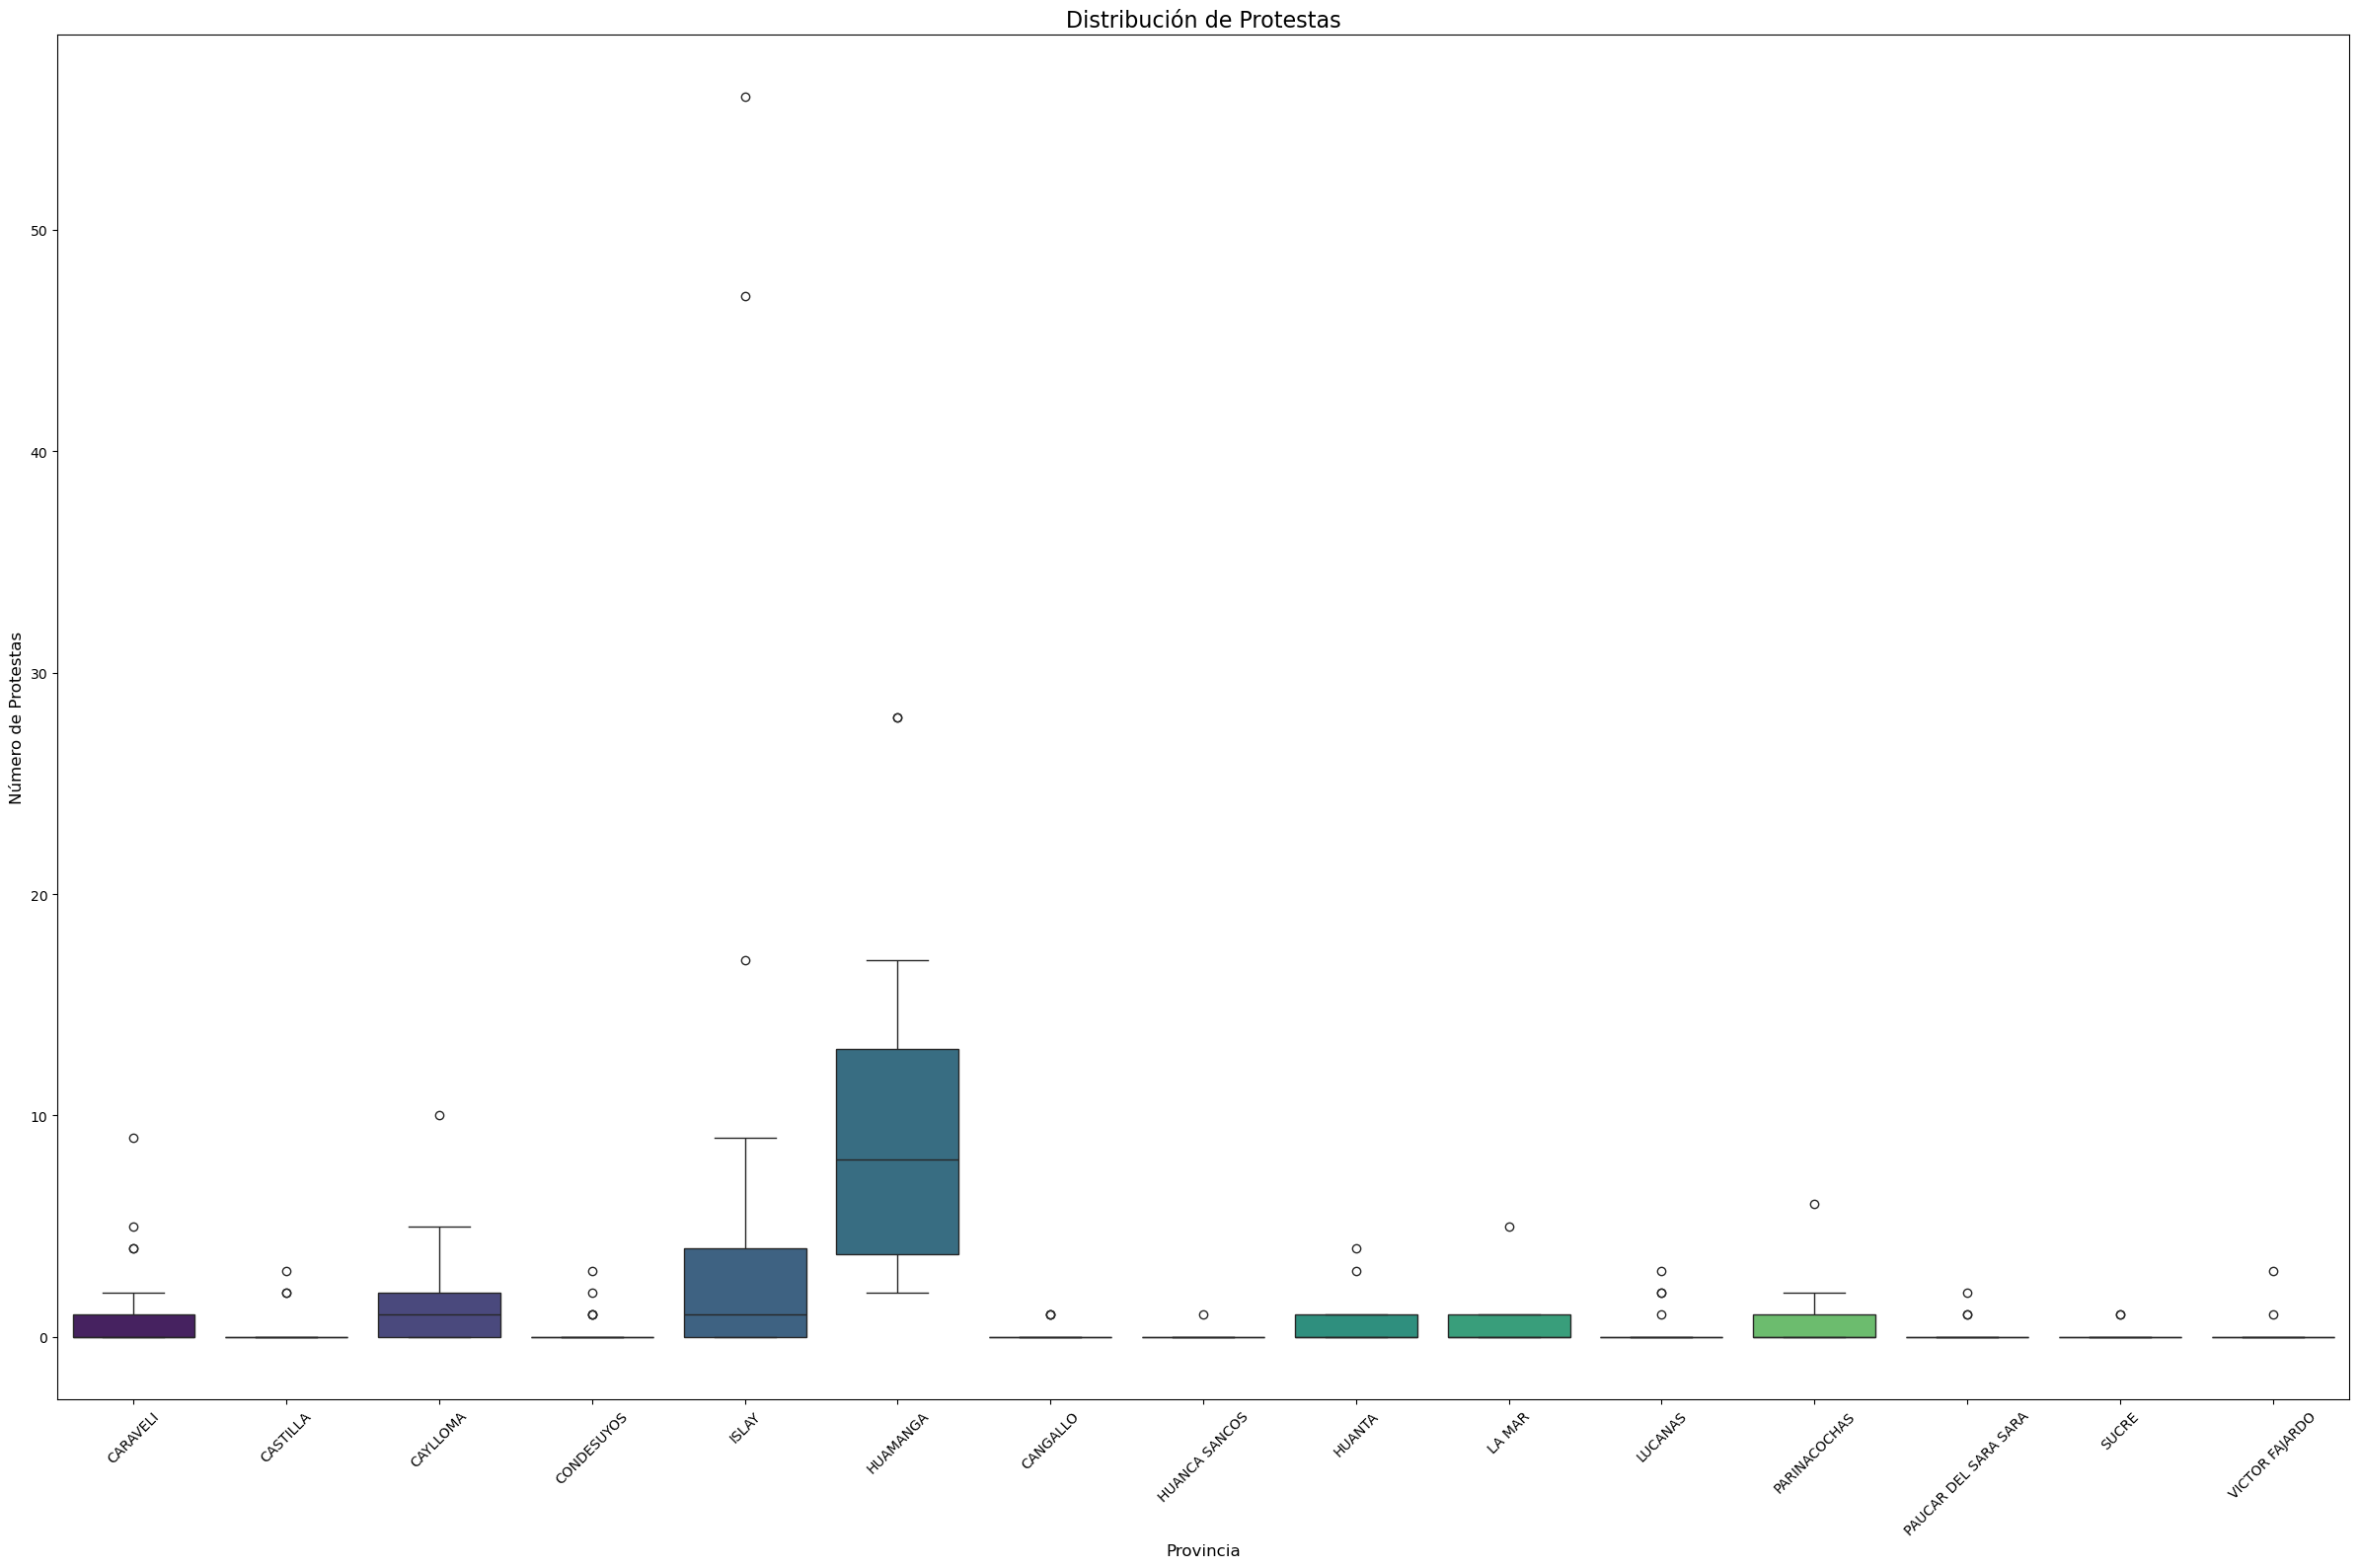

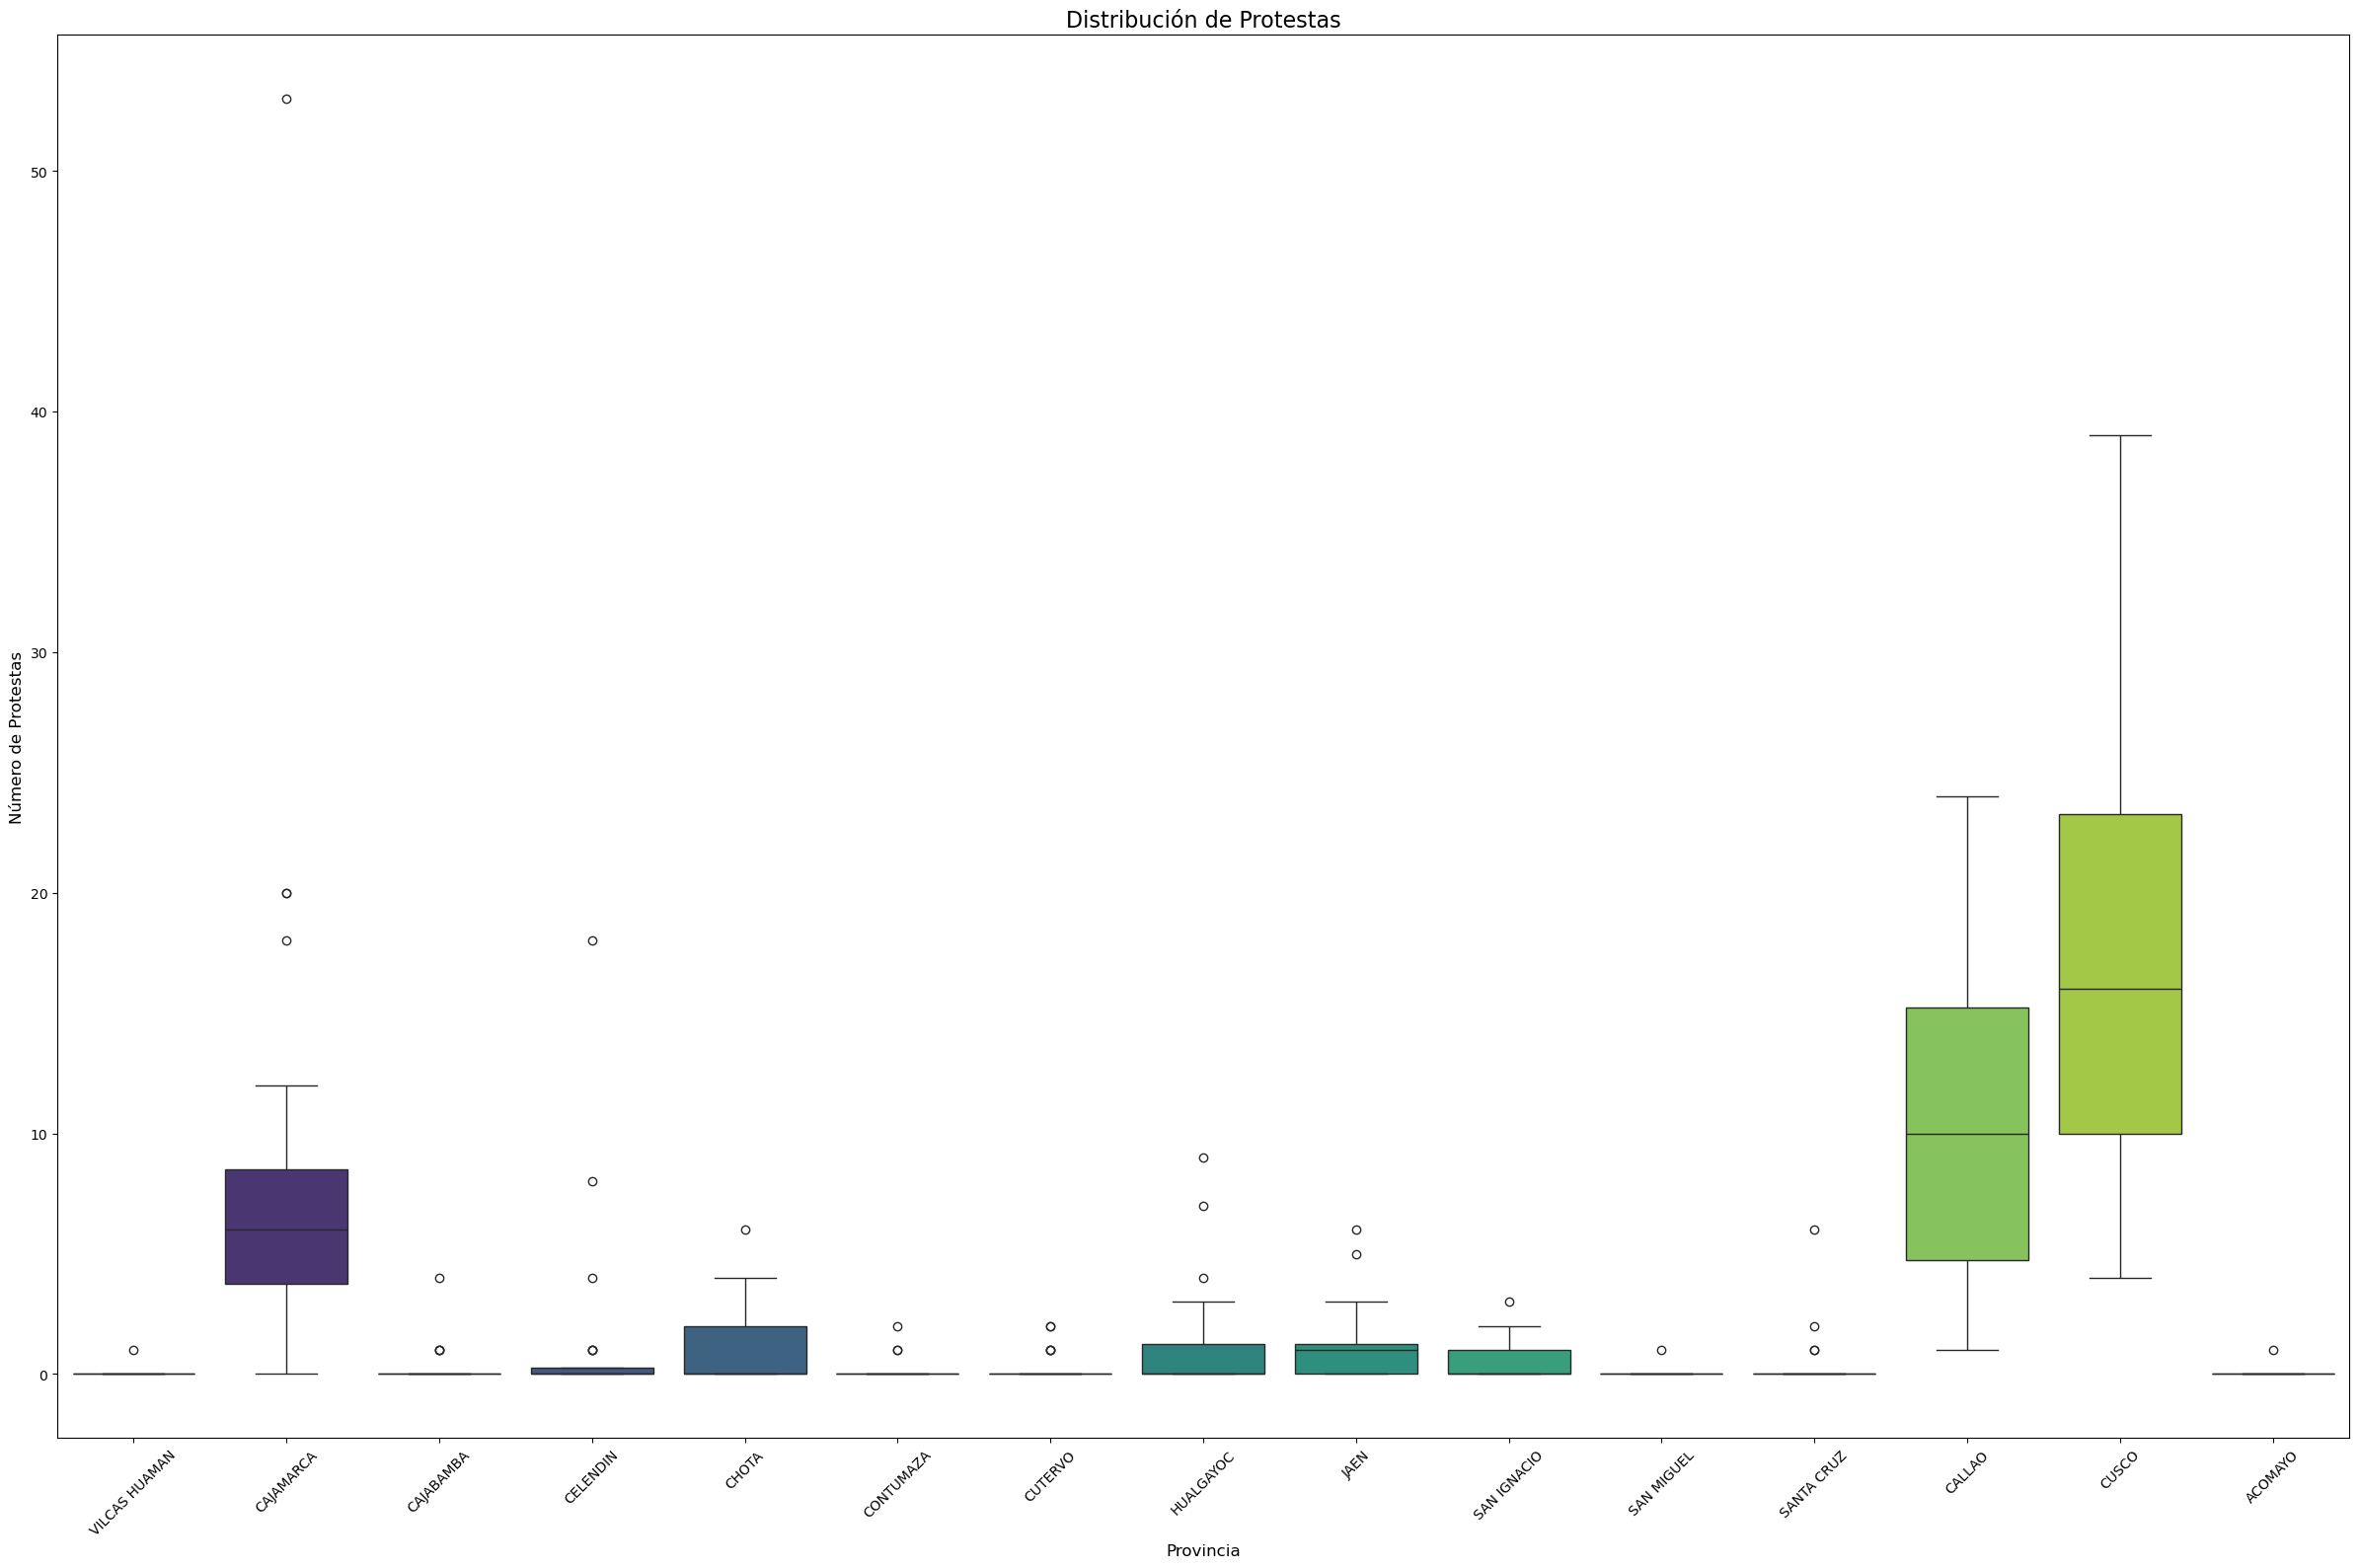

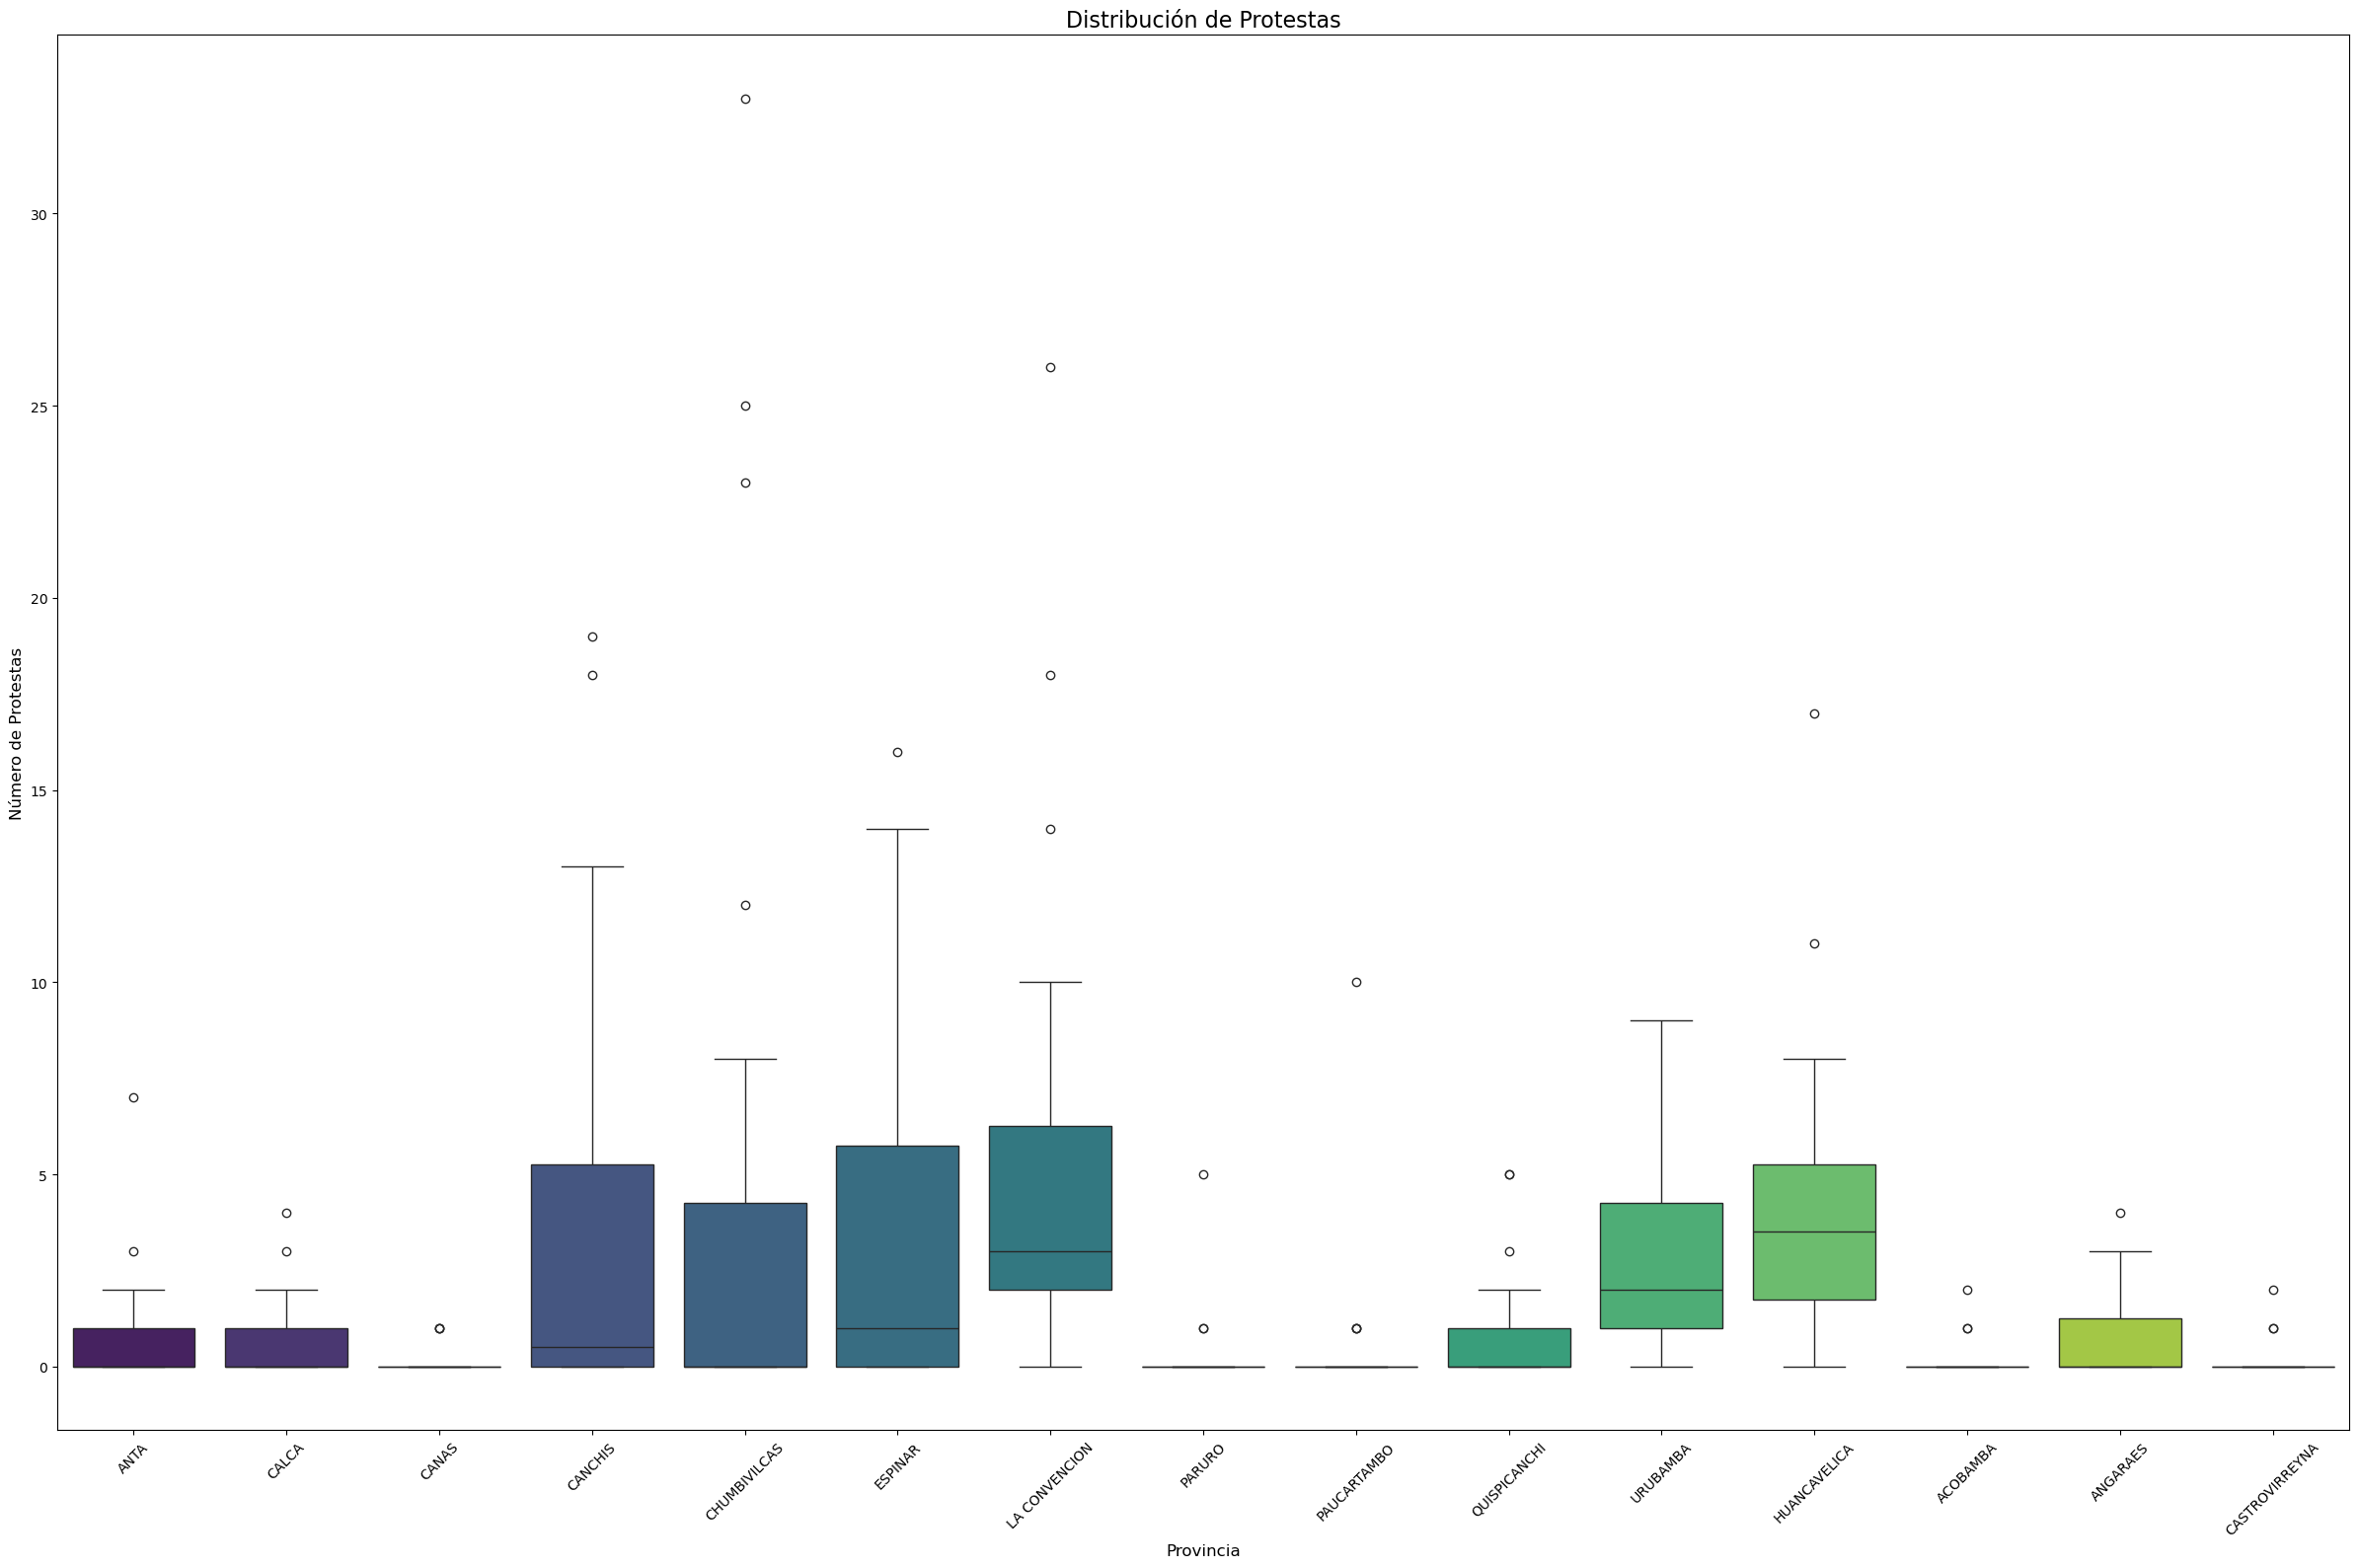

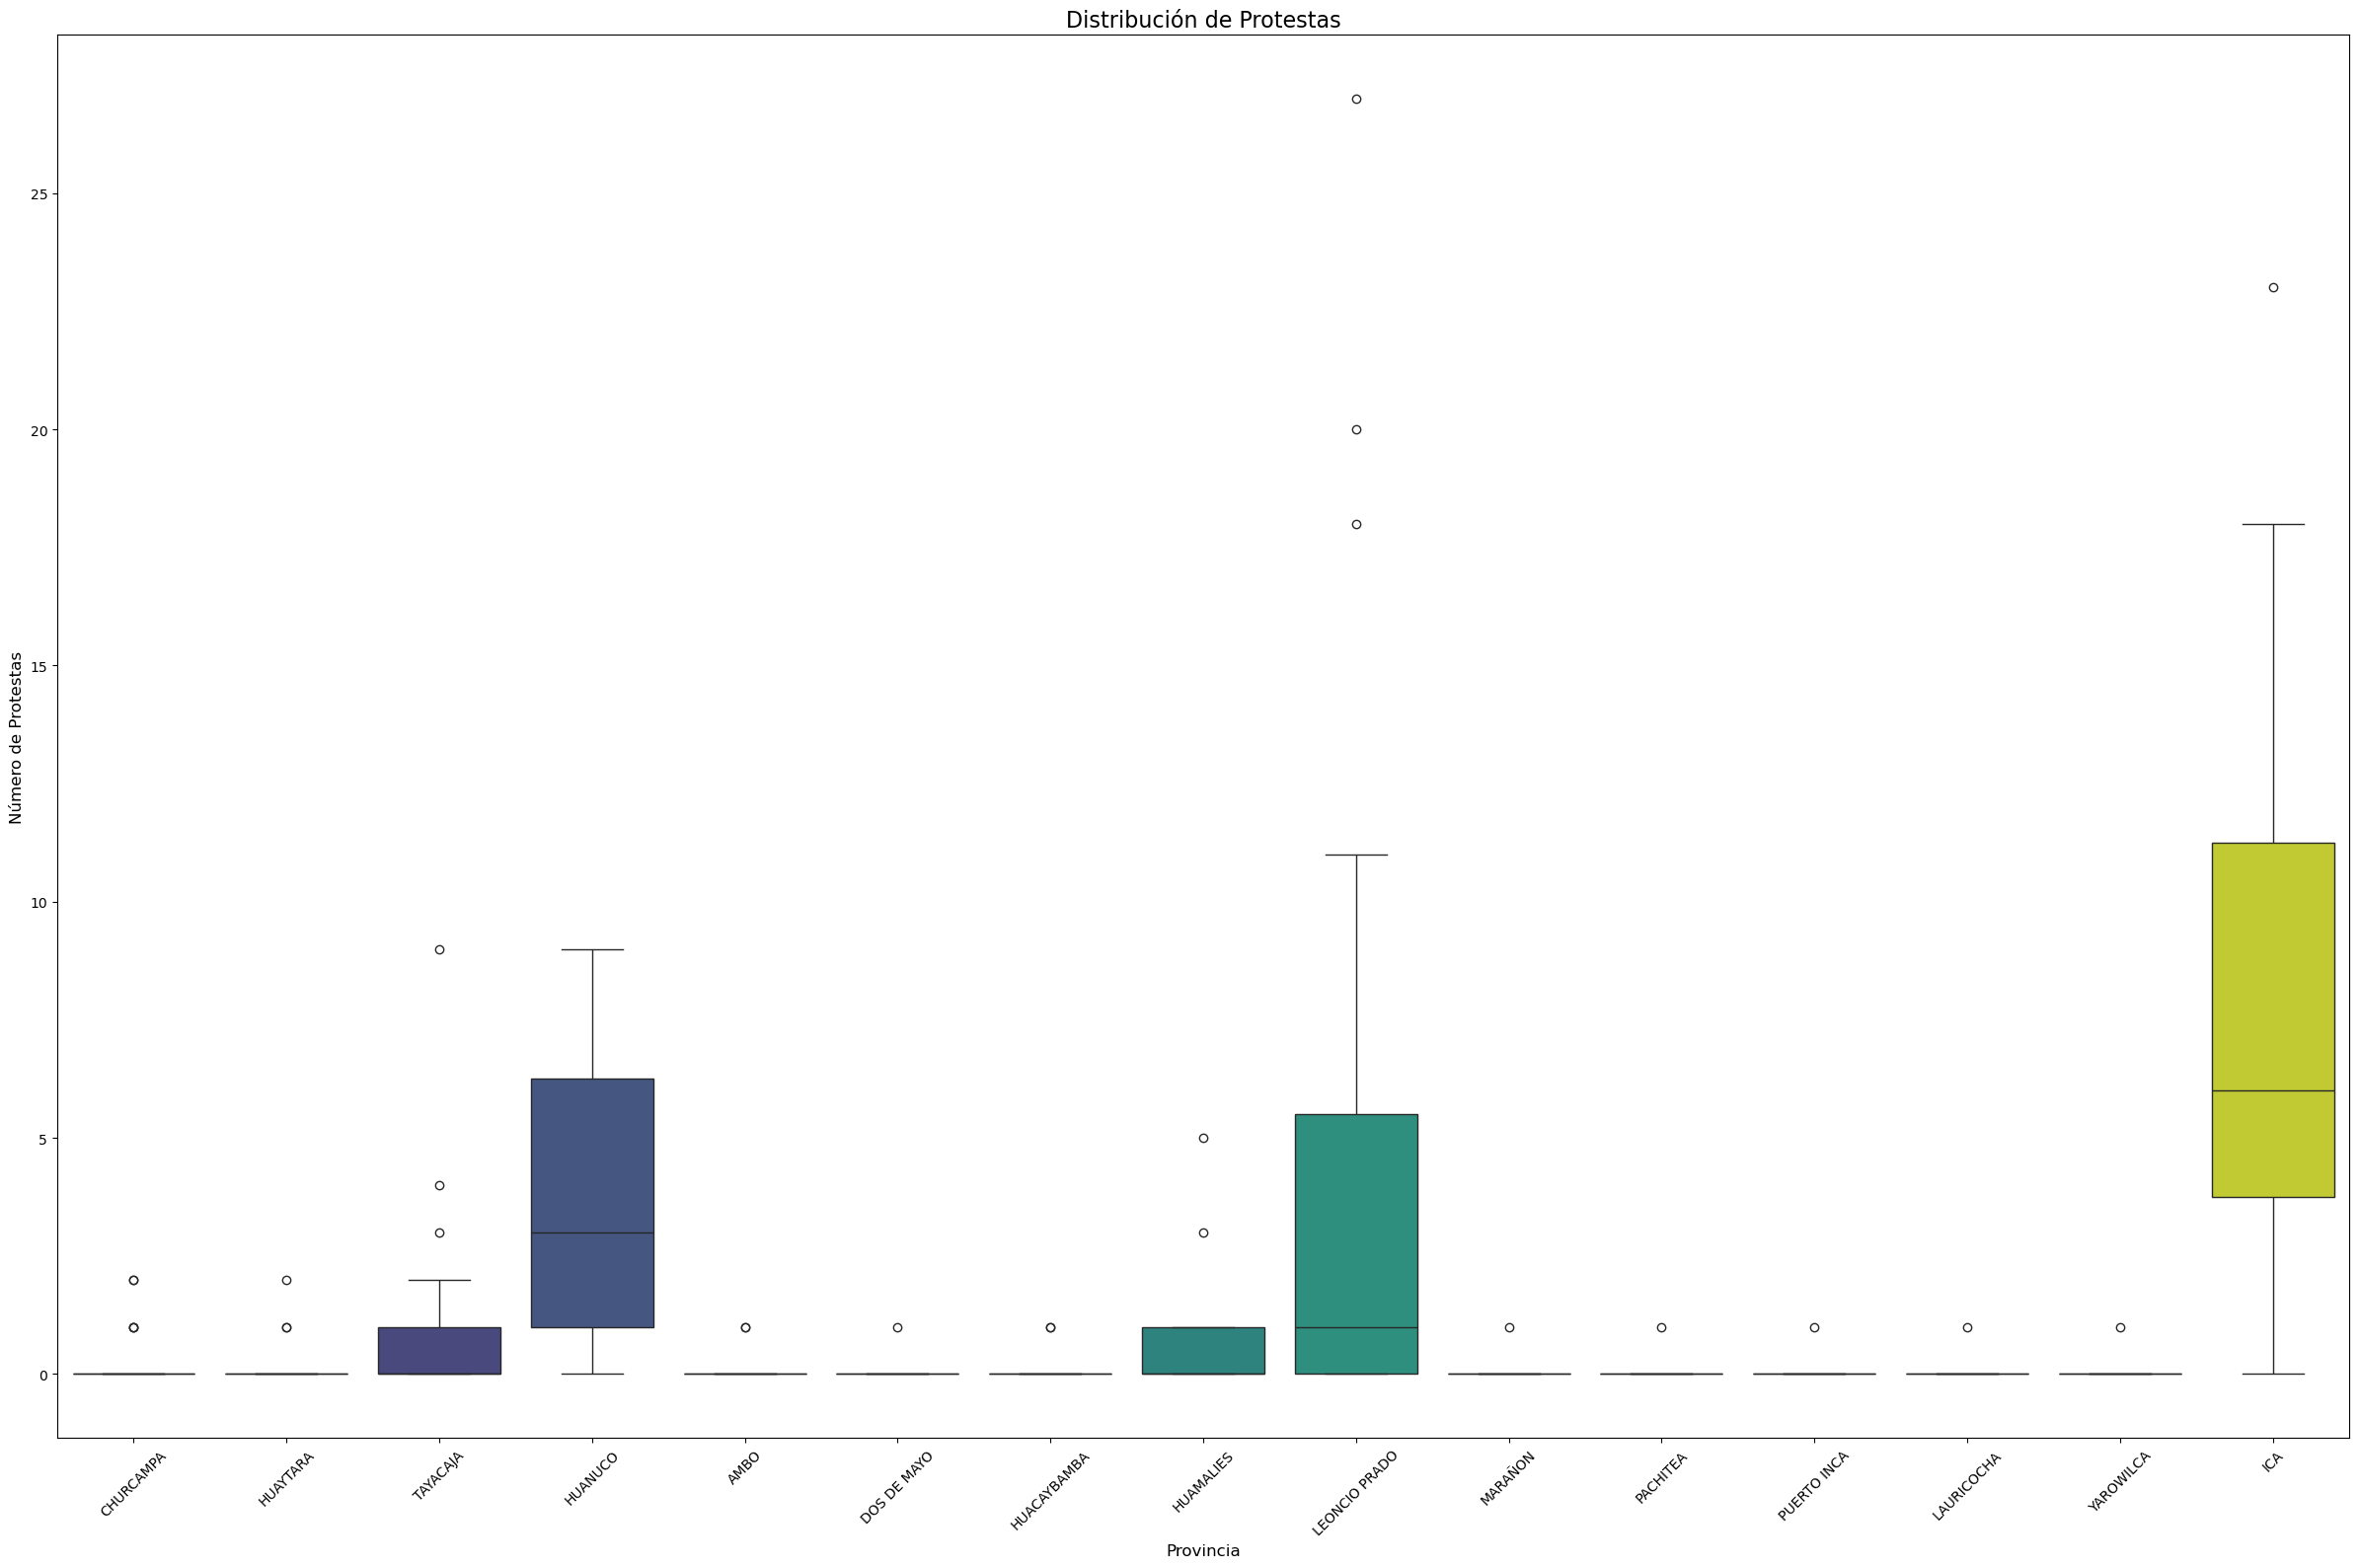

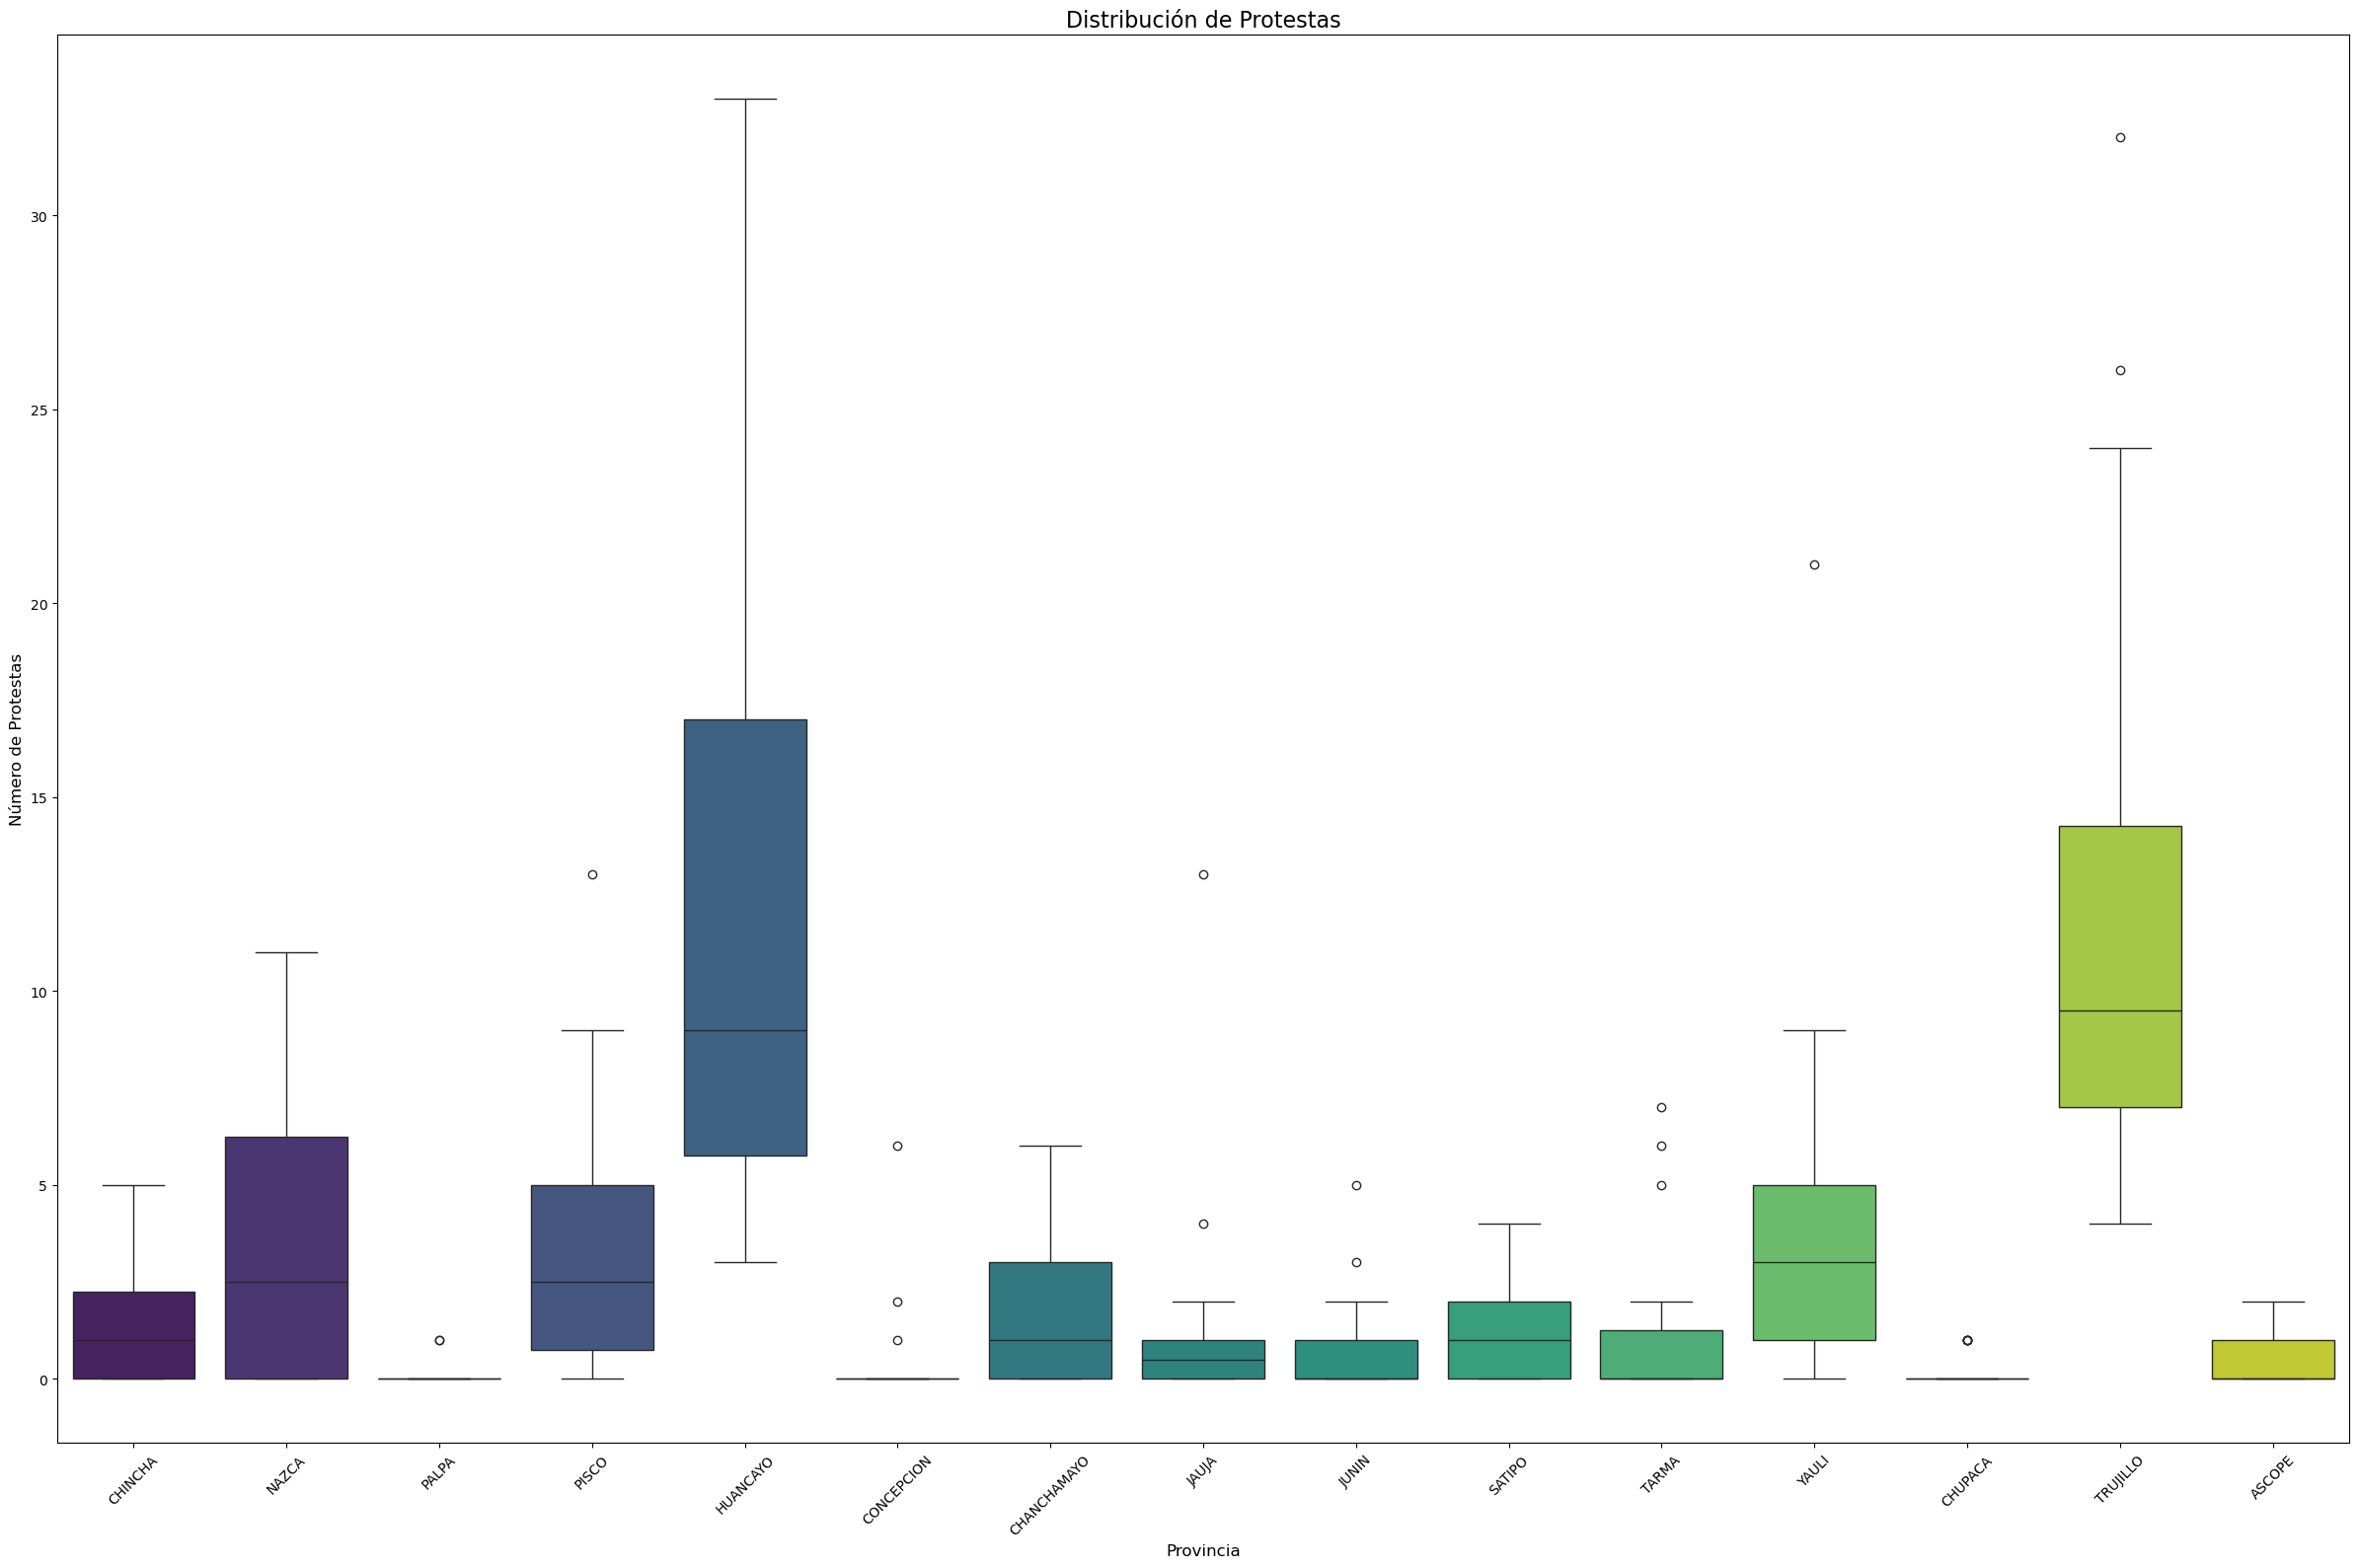

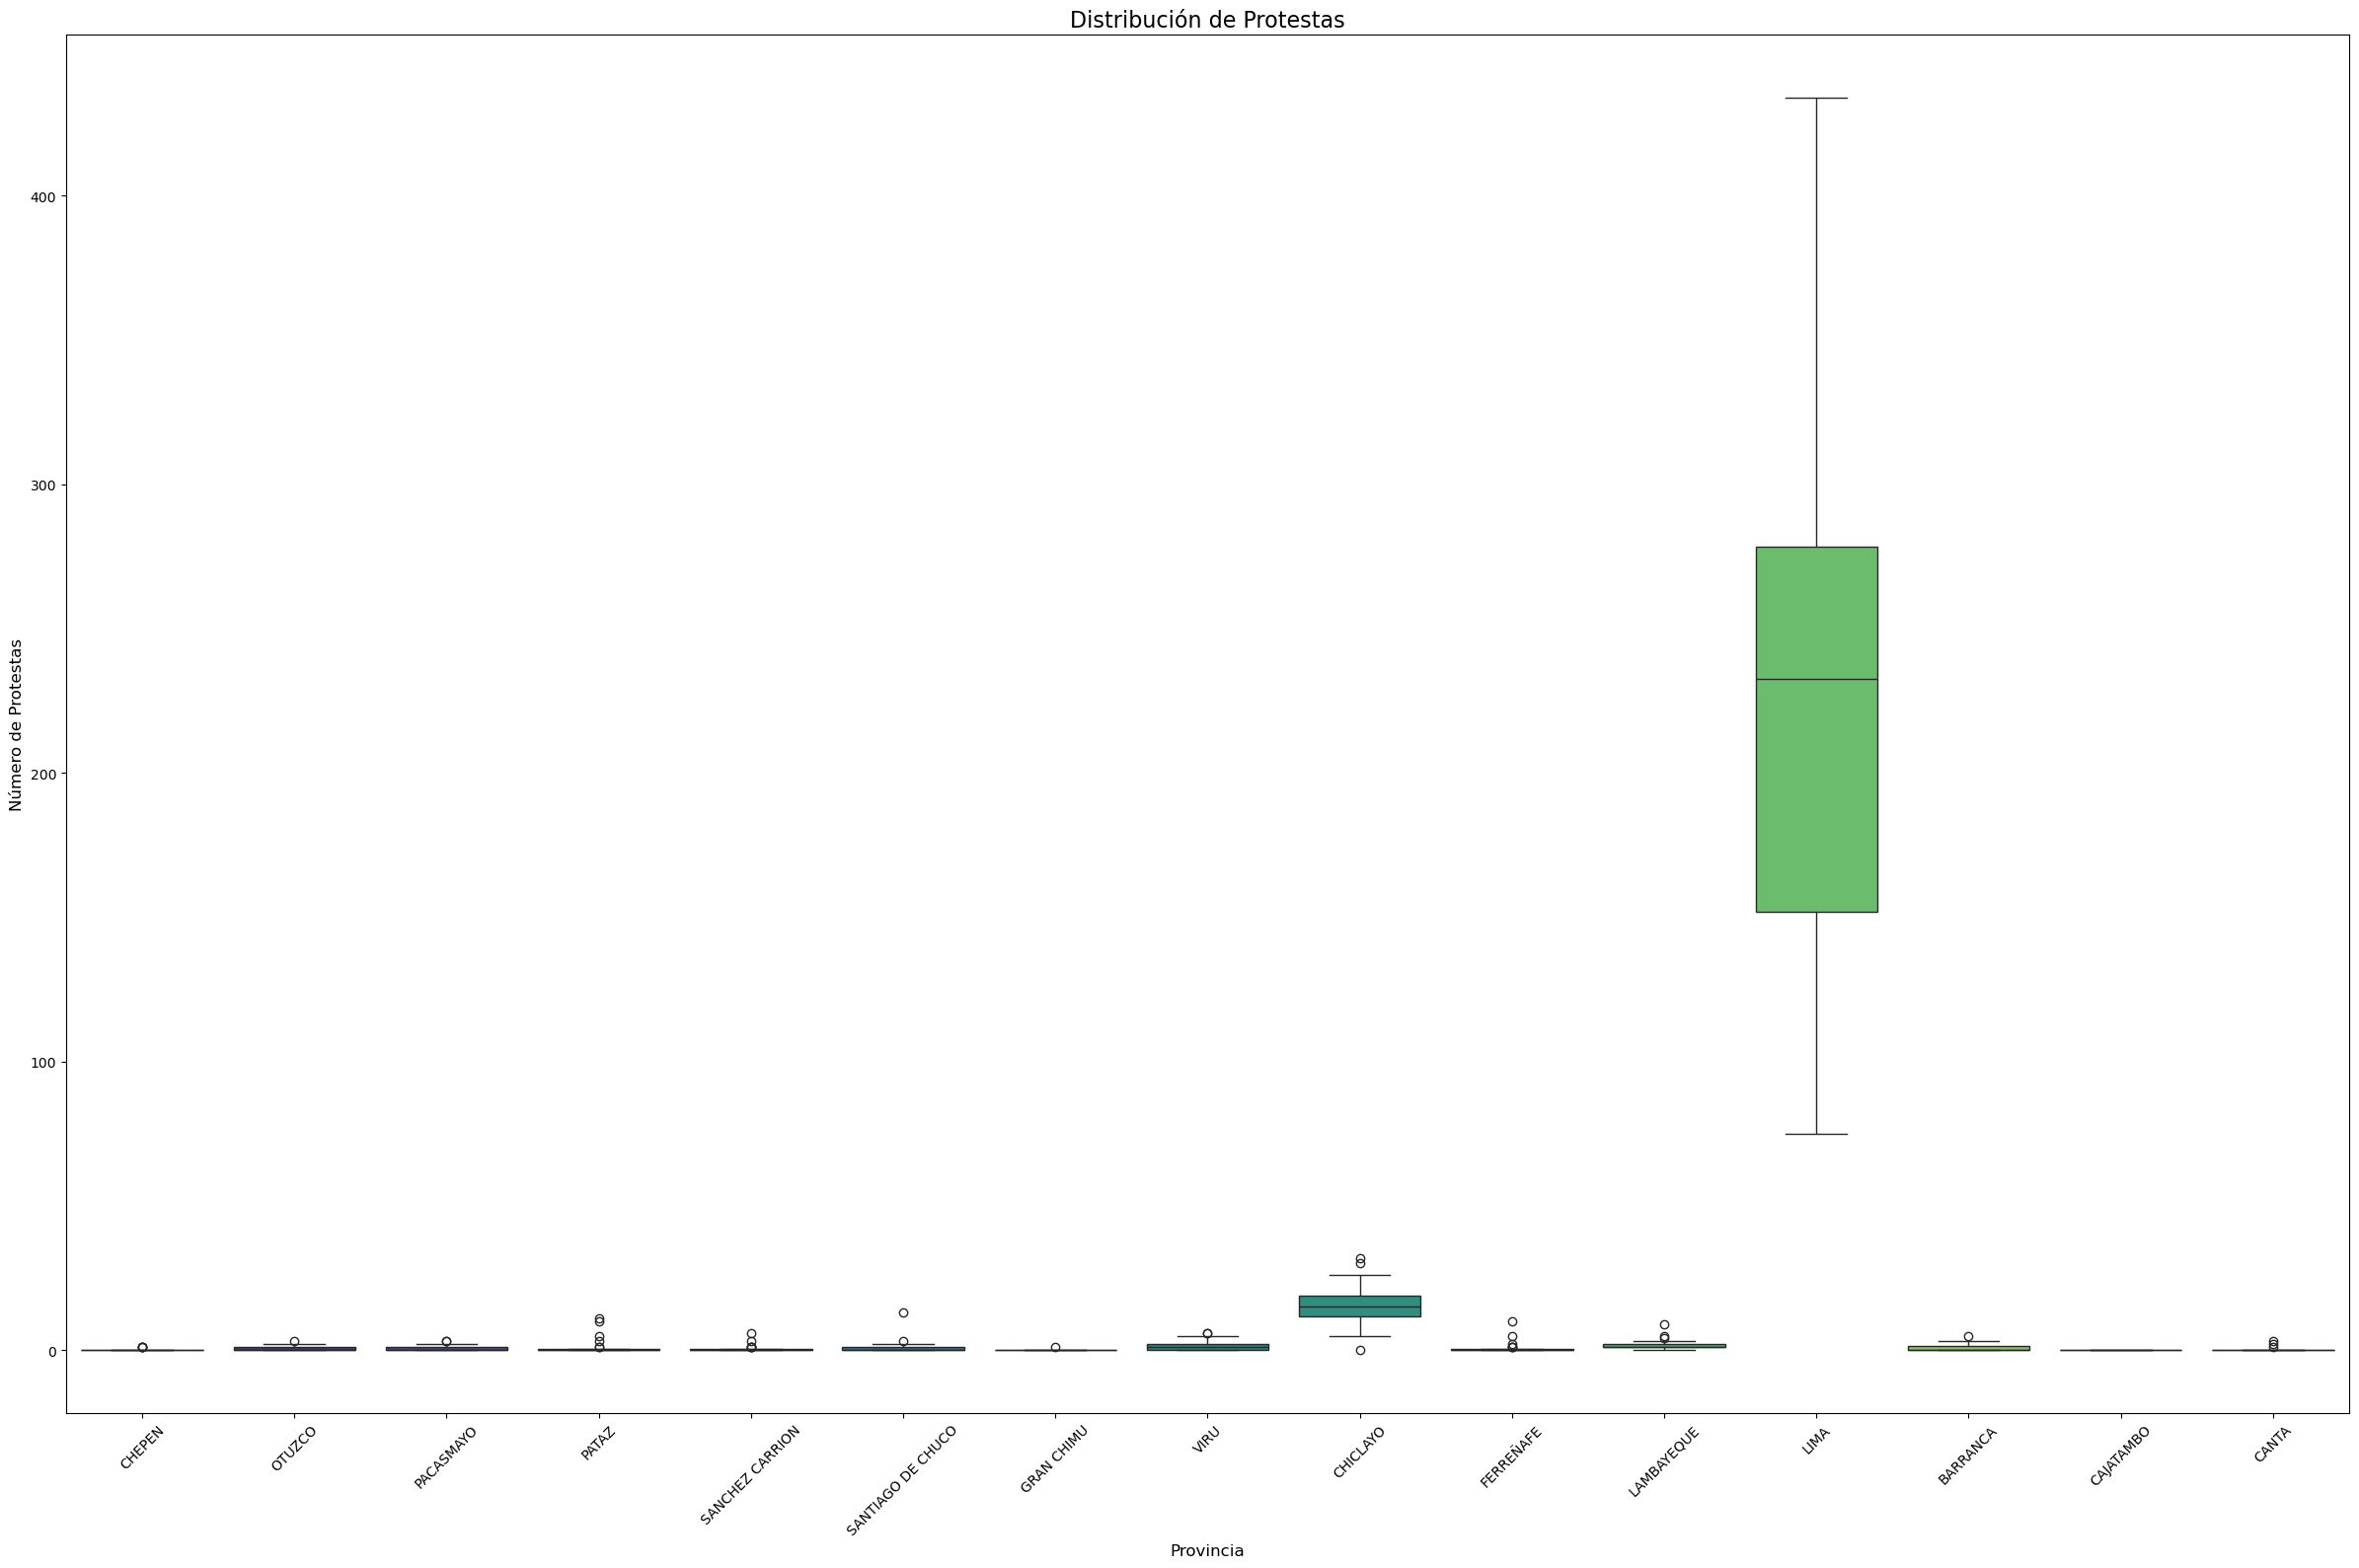

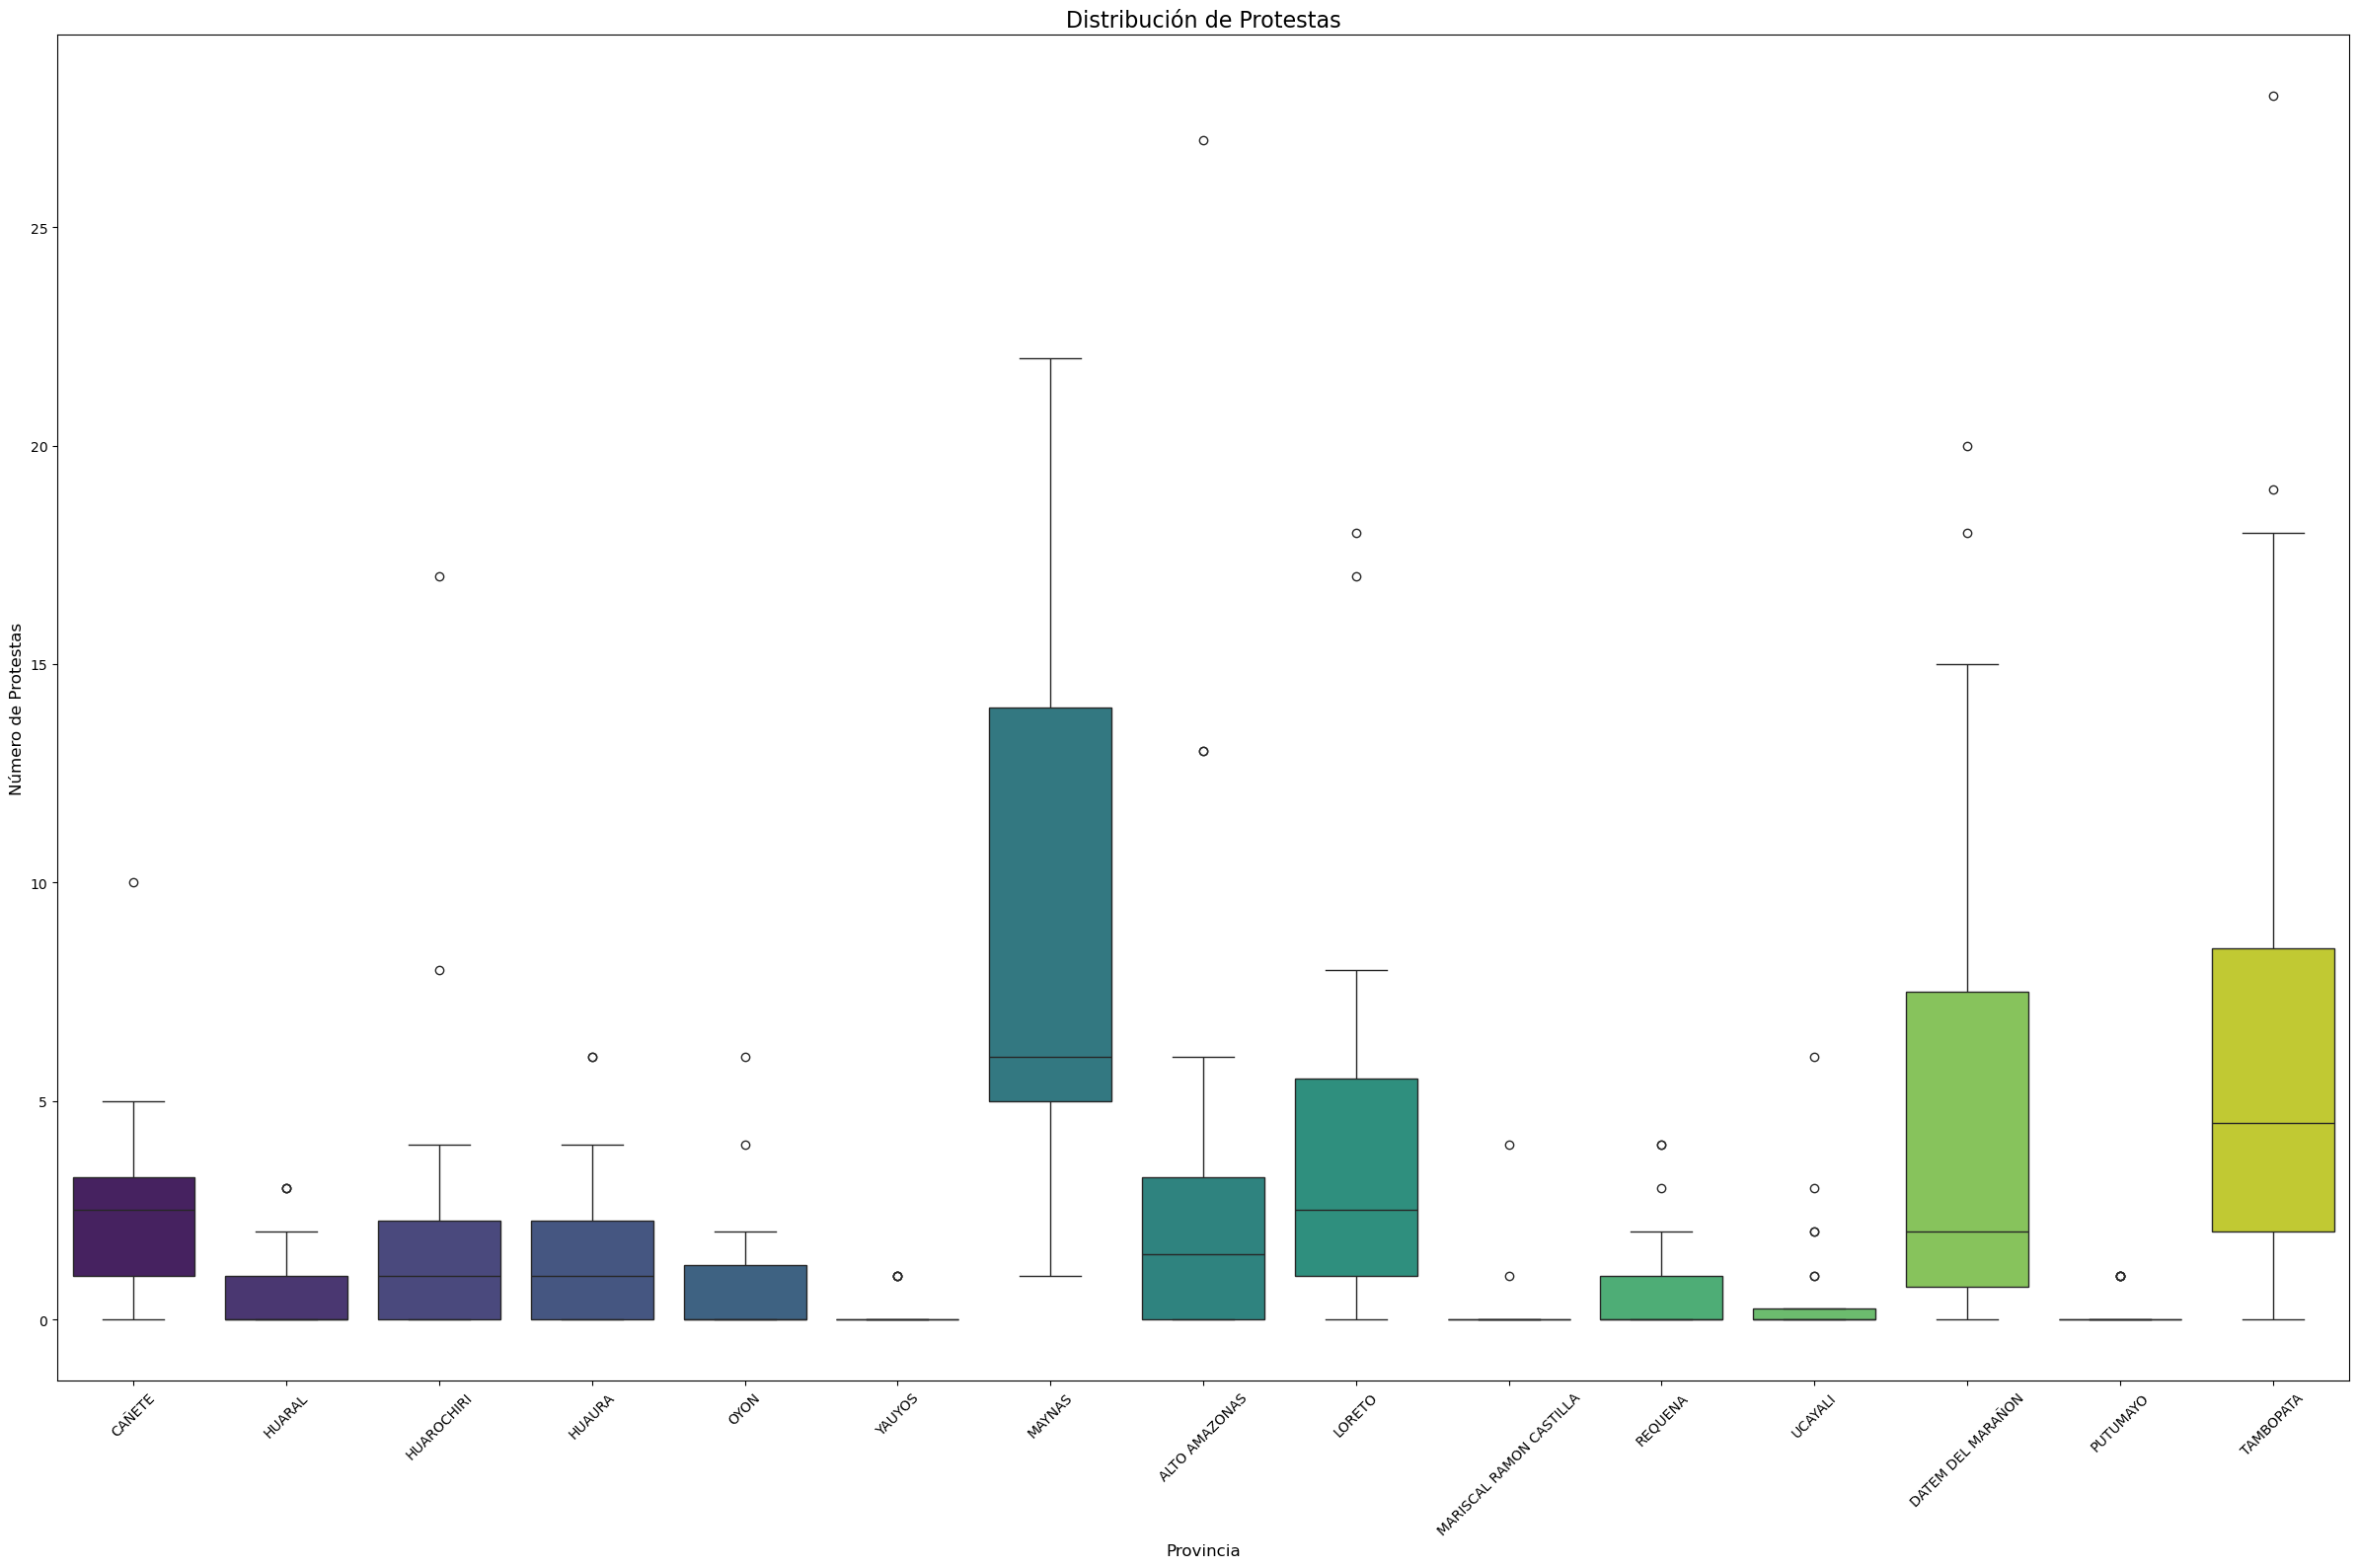

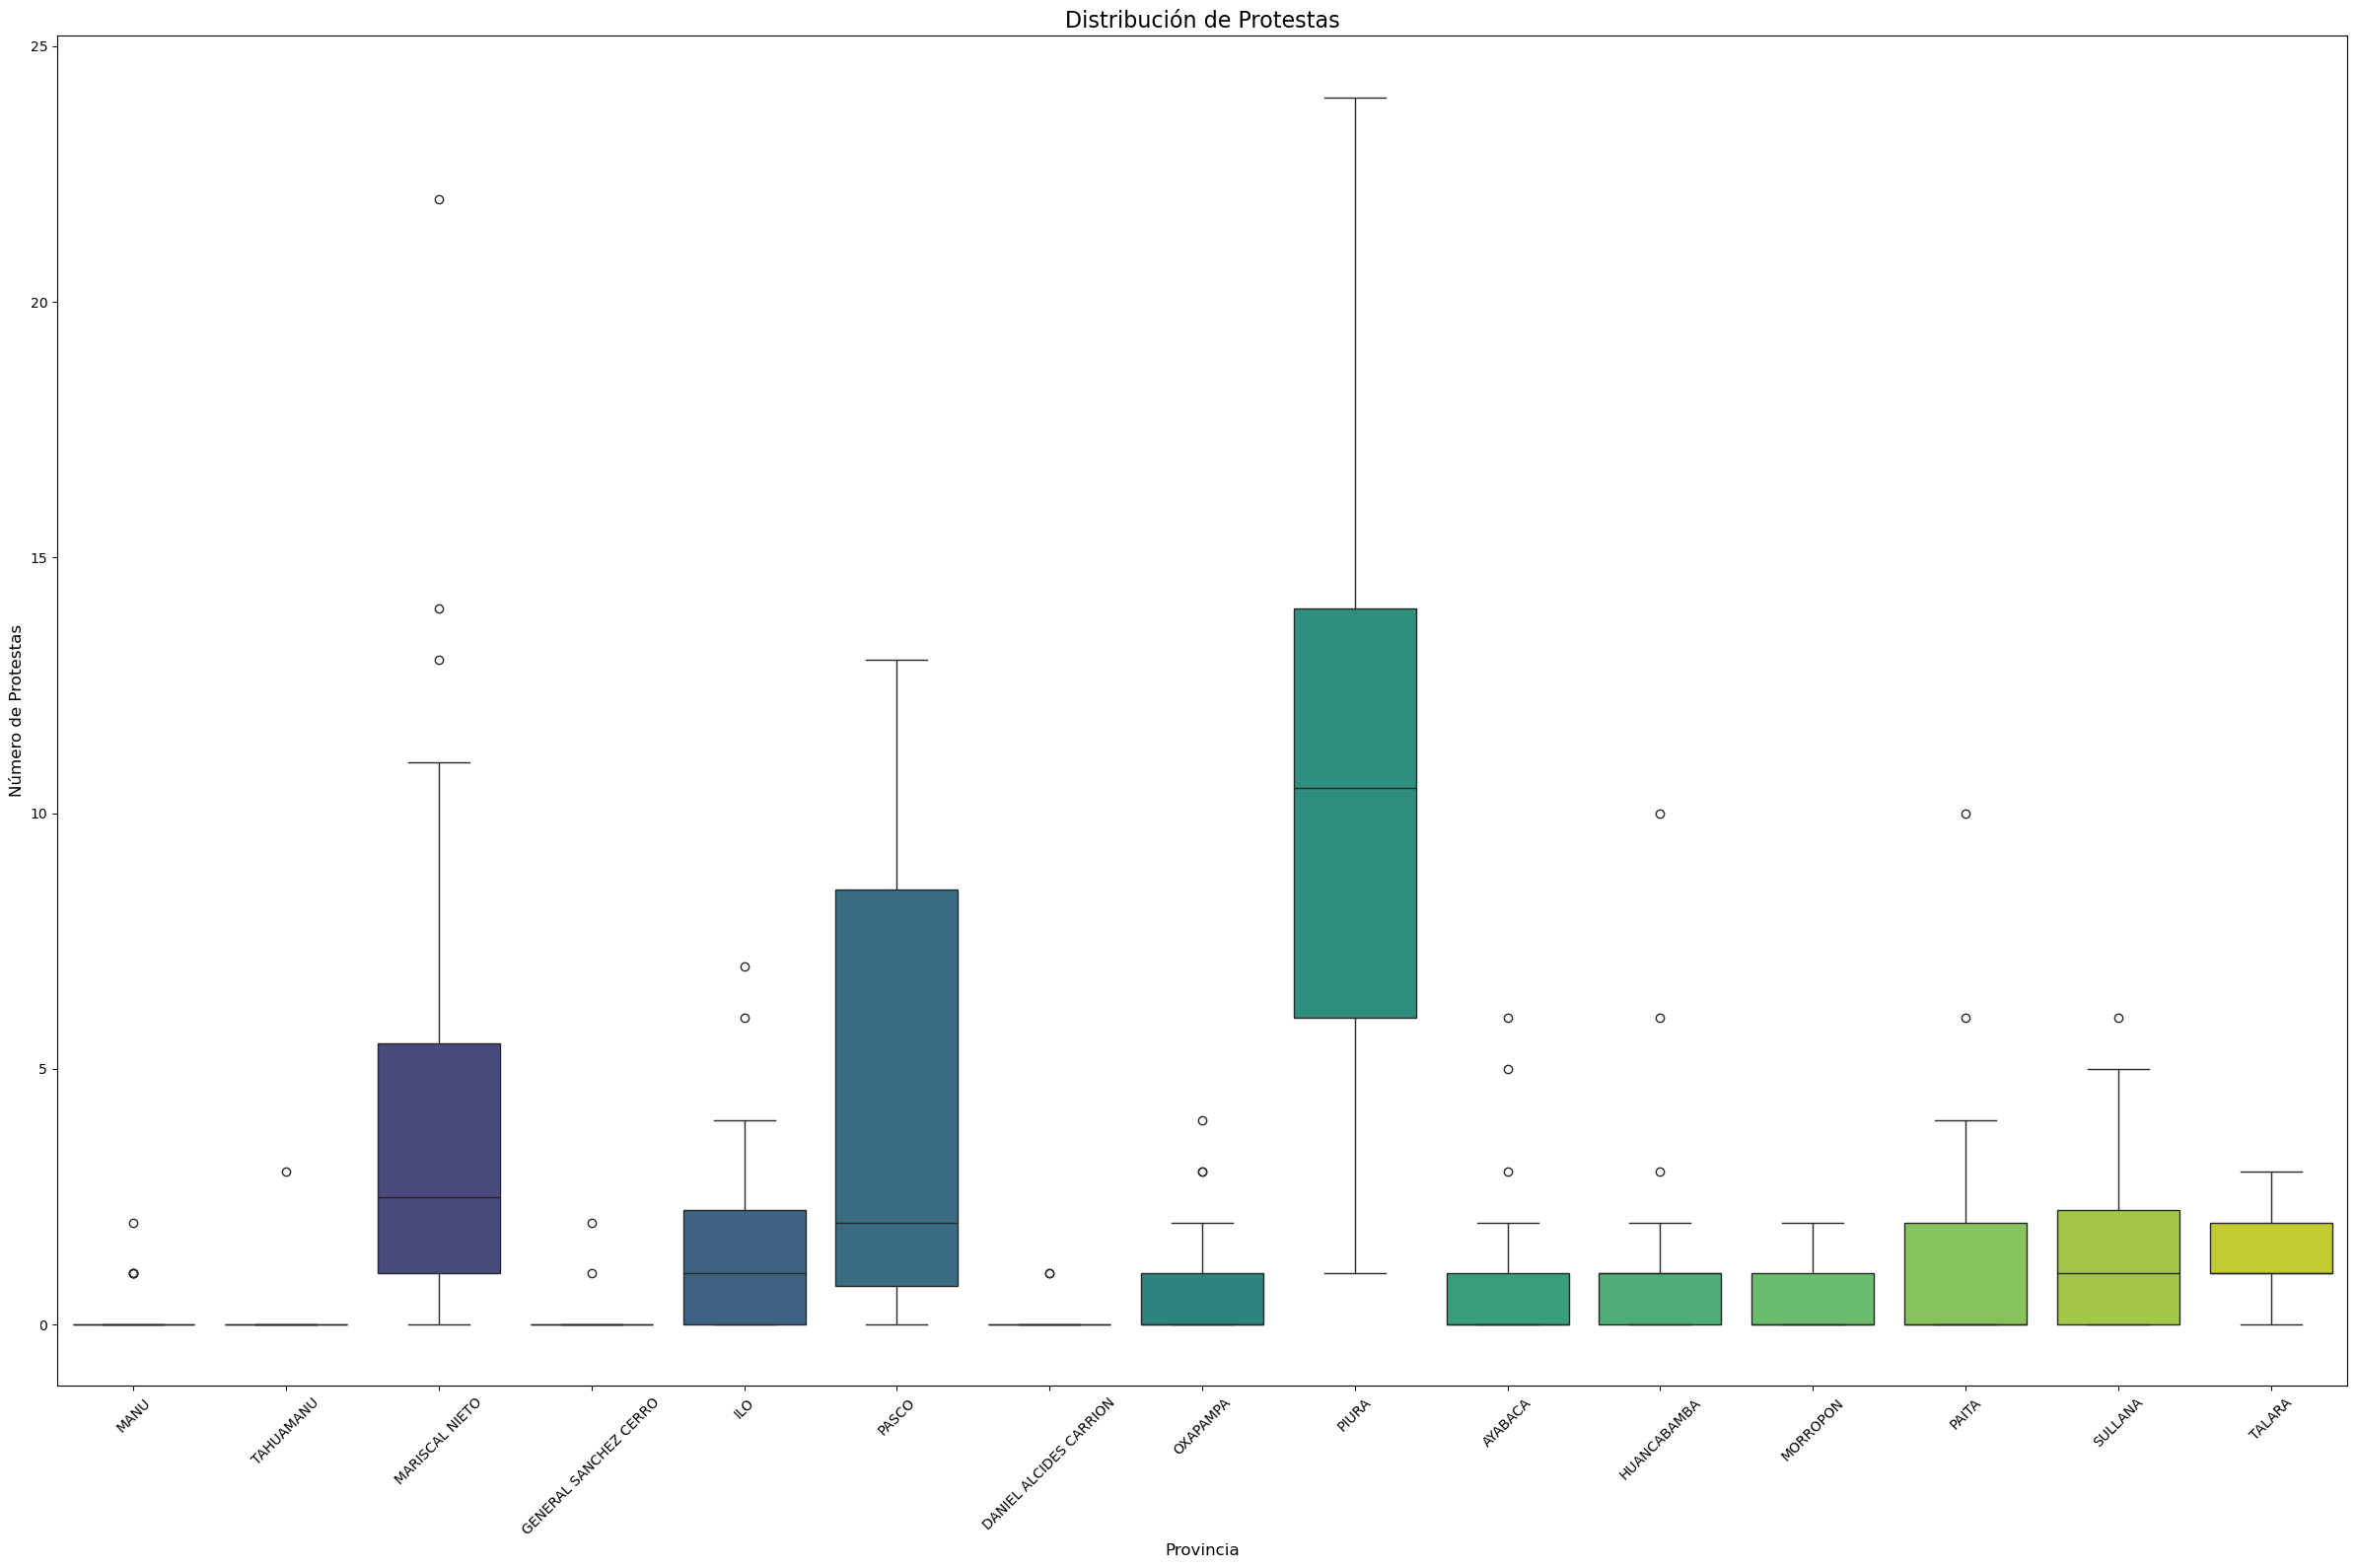

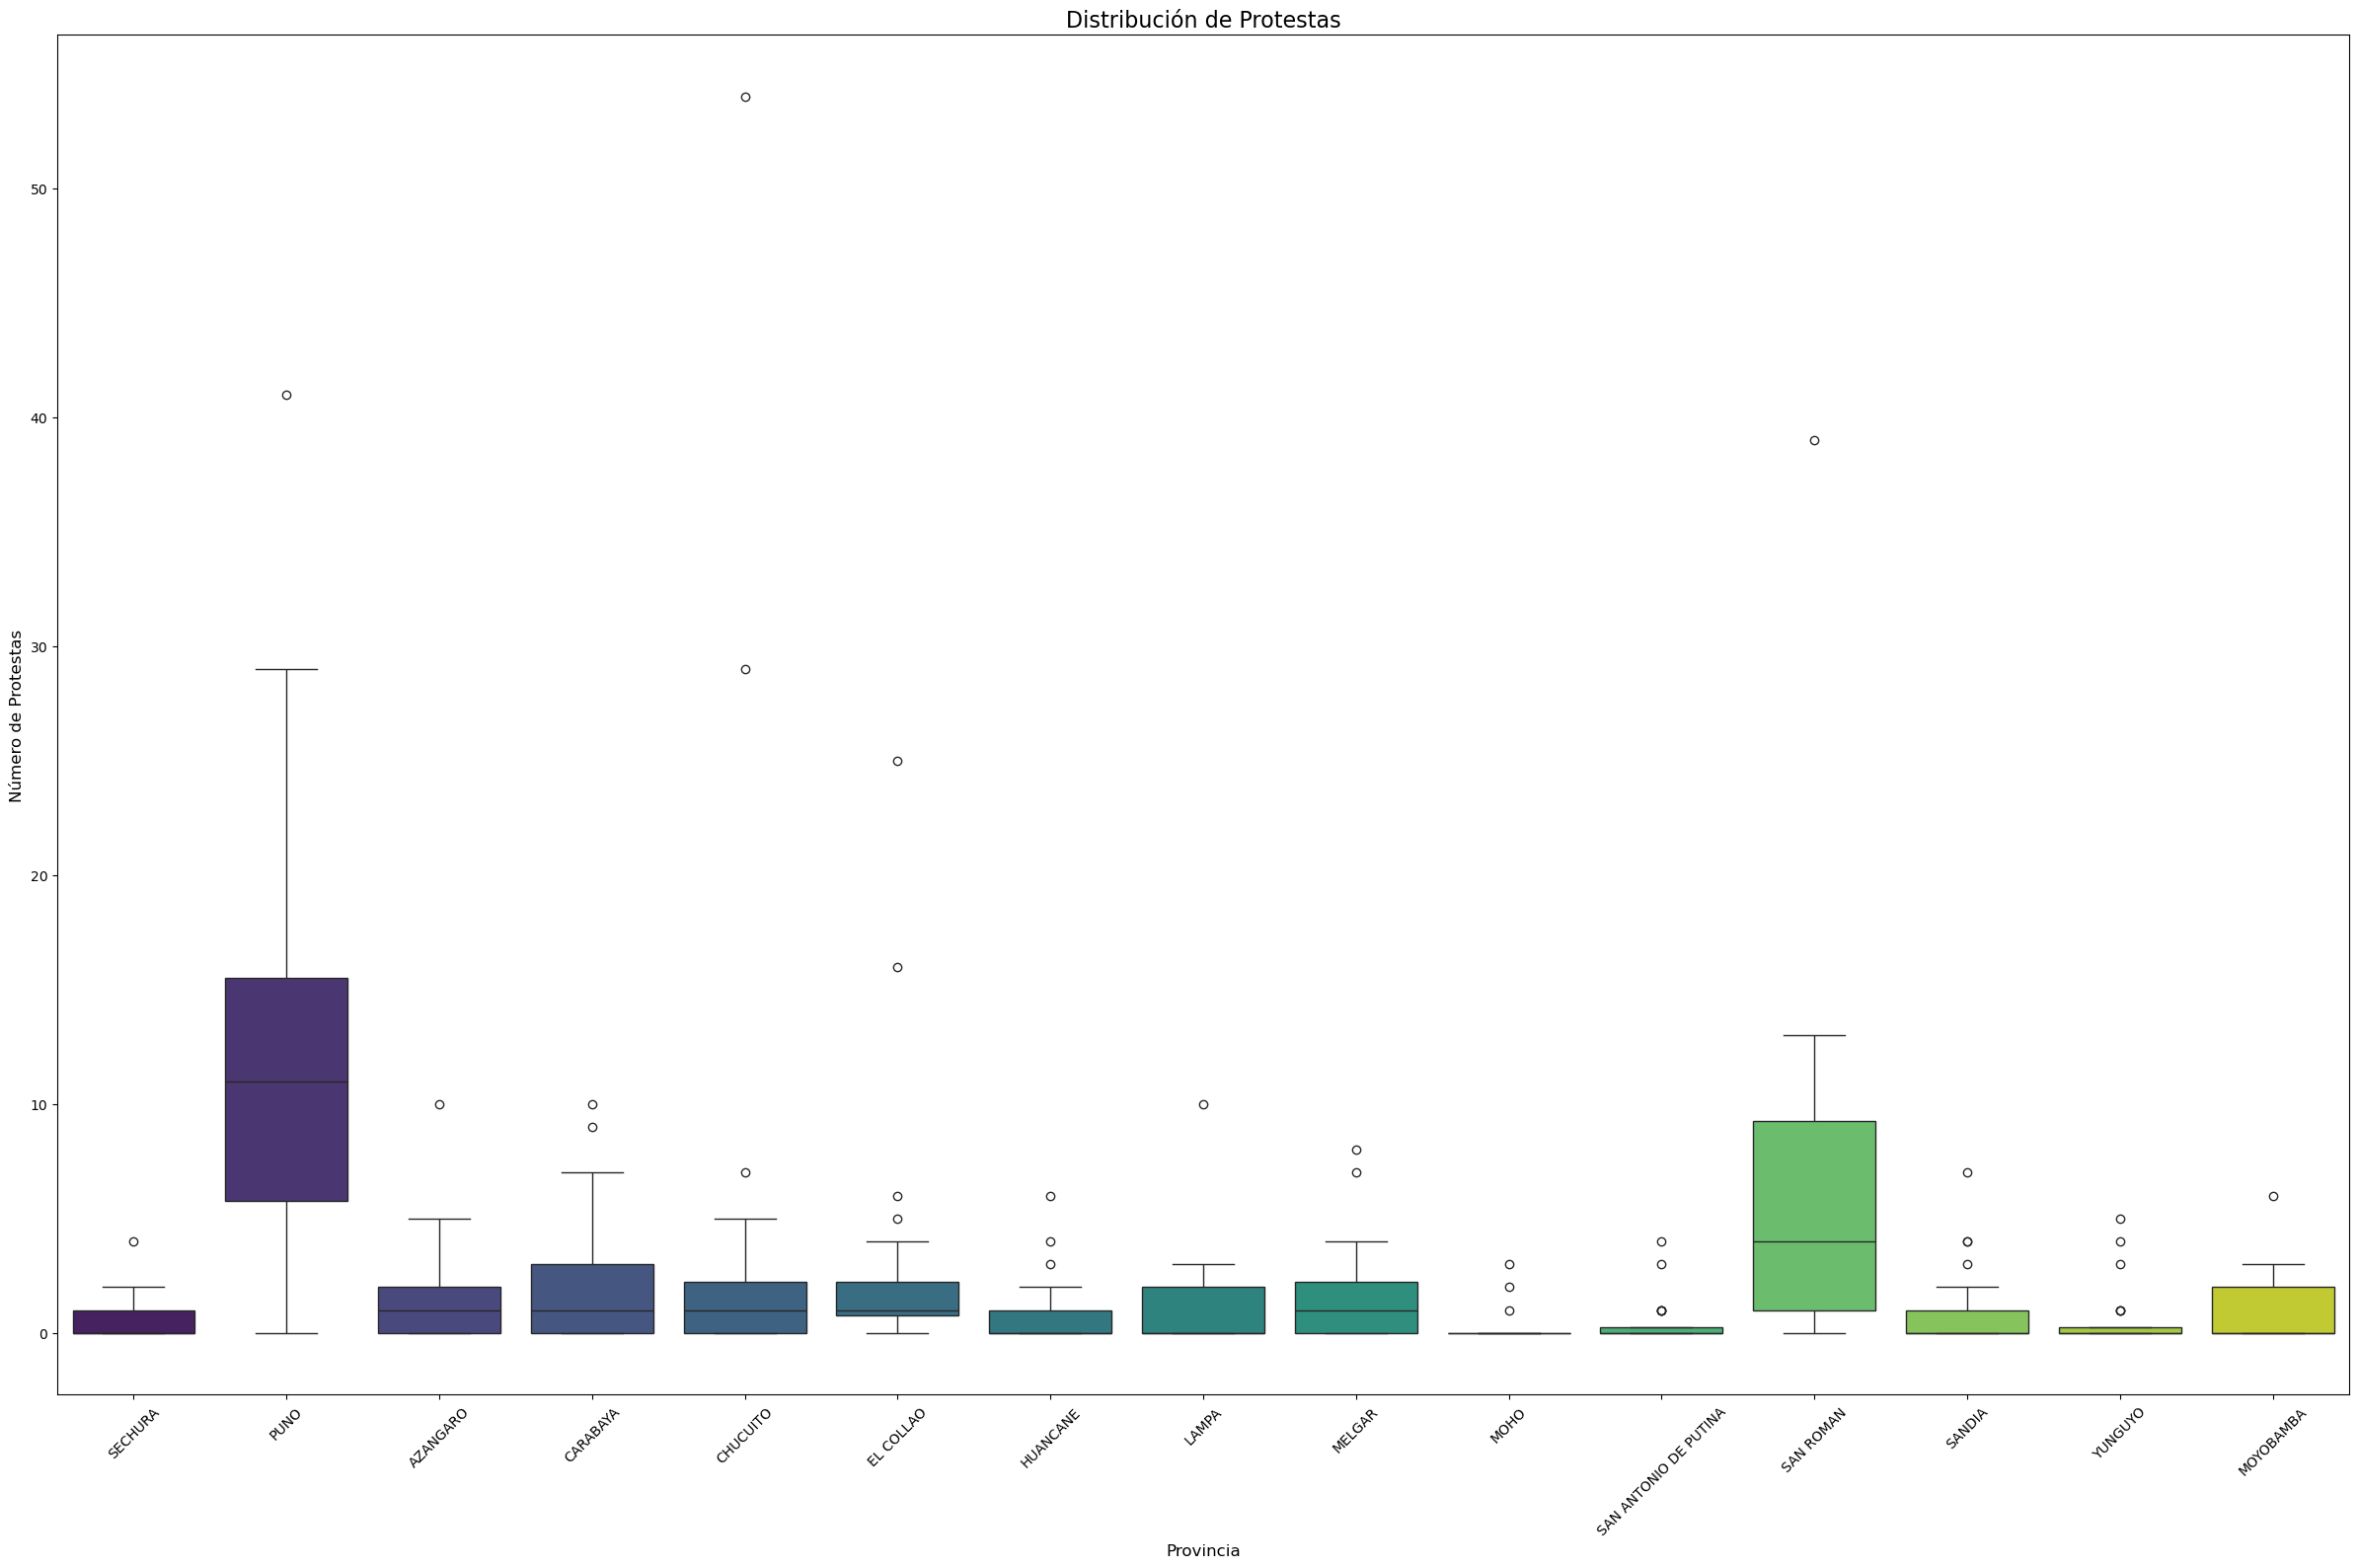

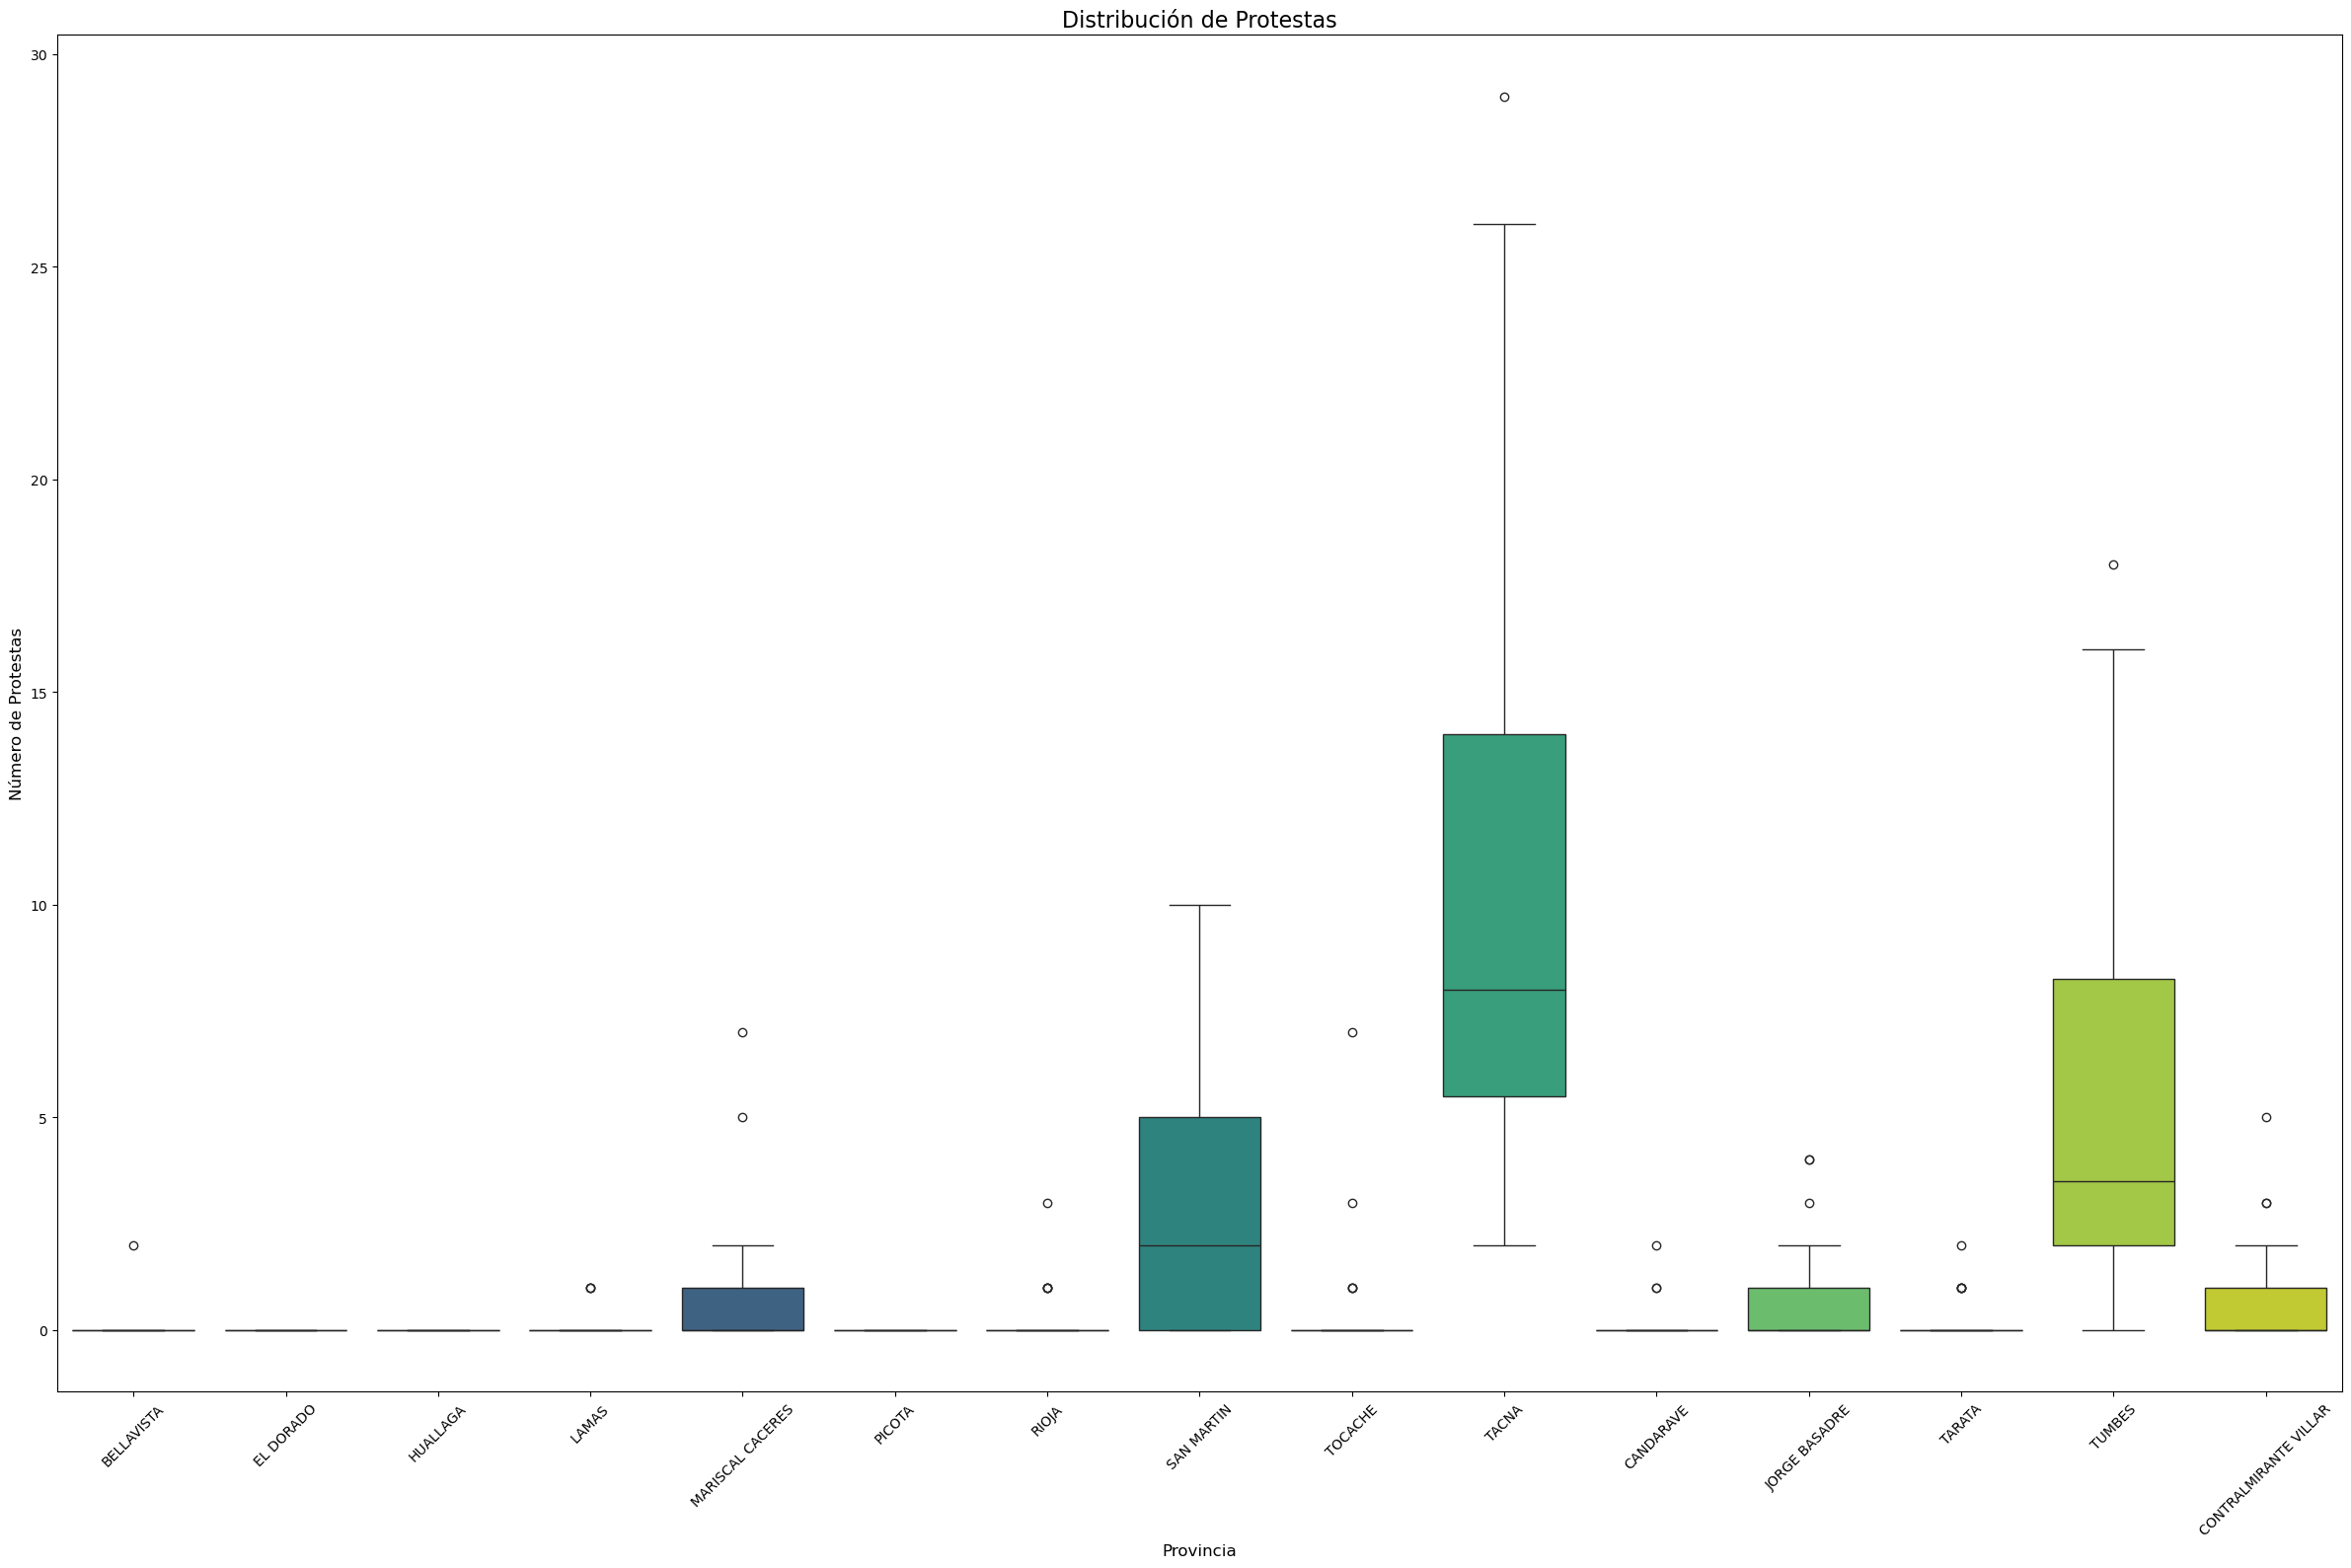

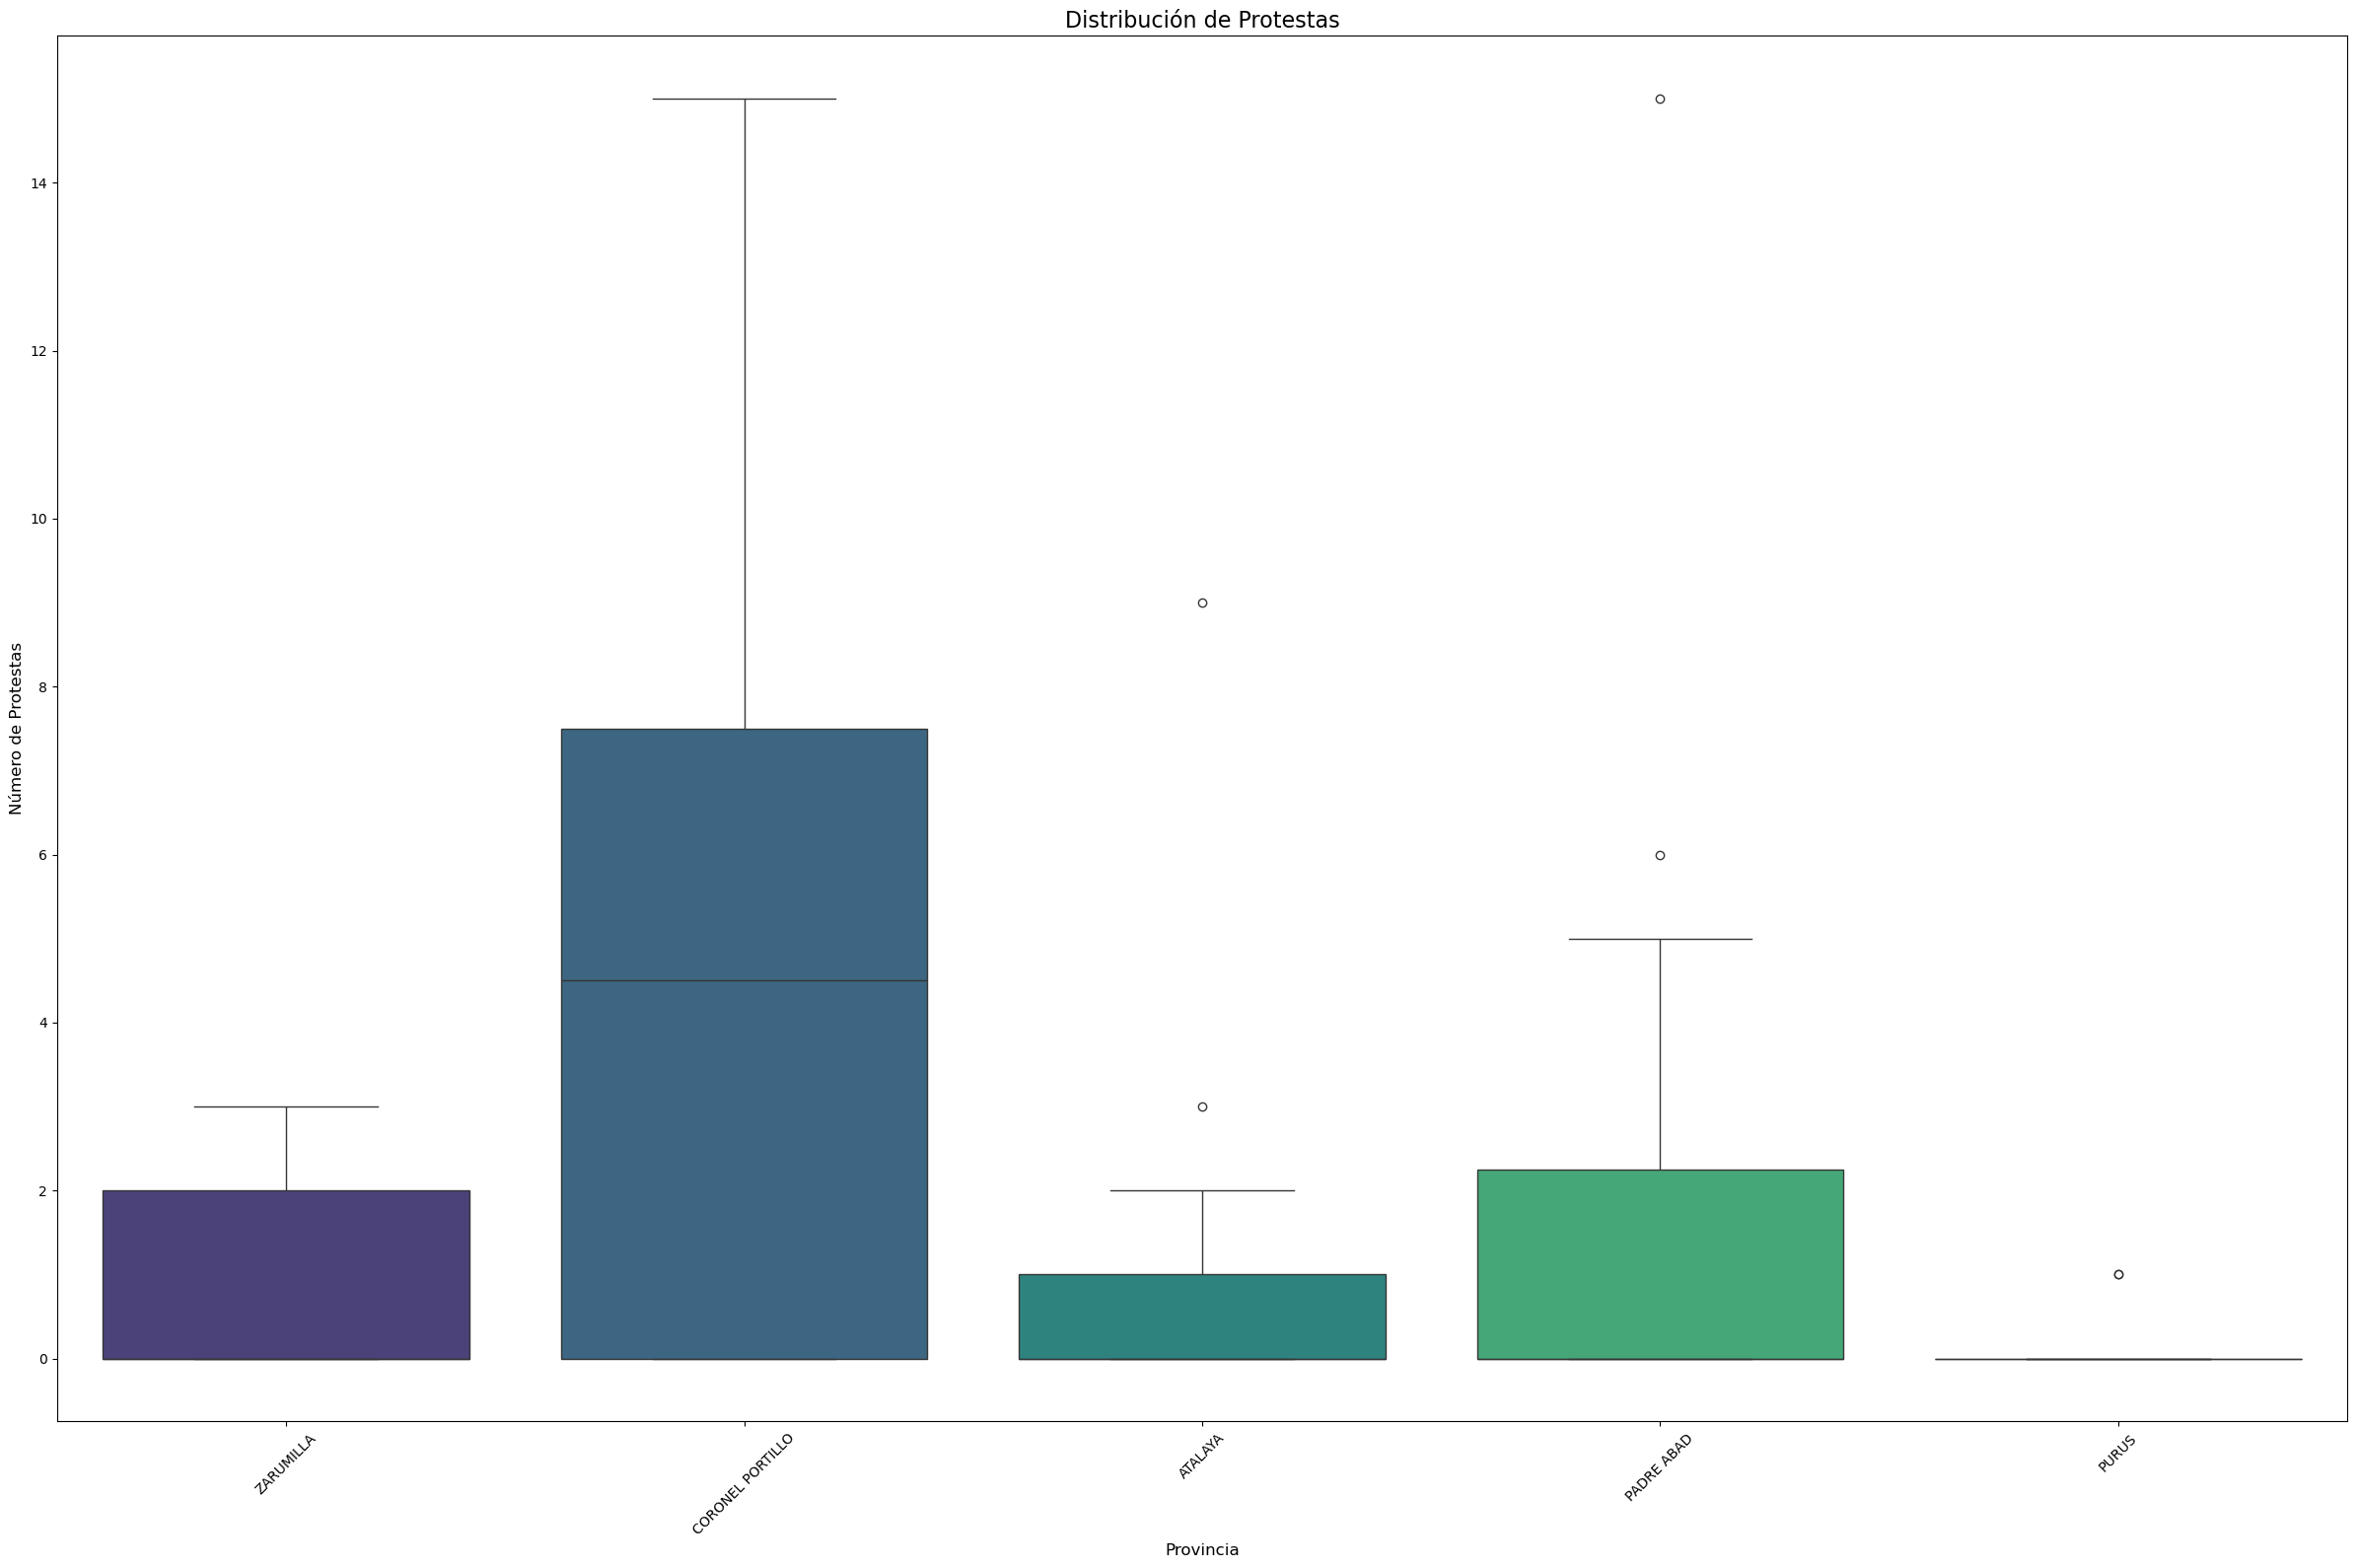

In [24]:
import seaborn as sns

# Asegúrate de que los datos estén en formato largo
years_columns = [str(year) for year in range(2000, 2024)]
data_long = gdf_provincias.melt(id_vars=['PROVINCIA'], value_vars=years_columns, 
                                var_name='Año', value_name='Protestas')
provincias = data_long['PROVINCIA'].unique()

# Número de provincias y el número de grupos
num_provincias = len(provincias)
num_groups = (num_provincias + 14) // 15  

for i in range(num_groups):
    plt.figure(figsize=(24, 16))  # Tamaño del gráfico
    
    provincias_subset = provincias[i*15:(i*15)+15]
    data_subset = data_long[data_long['PROVINCIA'].isin(provincias_subset)]
    
    # Boxplot
    sns.boxplot(x='PROVINCIA', y='Protestas', data=data_subset, palette='viridis')
    
    #Personalizamos
    plt.xticks(rotation=45)  # Rote los nombres de las provincias para mejor visibilidad
    plt.title(f'Distribución de Protestas', fontsize=16)
    plt.xlabel('Provincia', fontsize=12)
    plt.ylabel('Número de Protestas', fontsize=12)
    
    
    plt.tight_layout()
    plt.show()

Como casi todos tienen datos atípicos, hacemos el cálculo con la mediana 

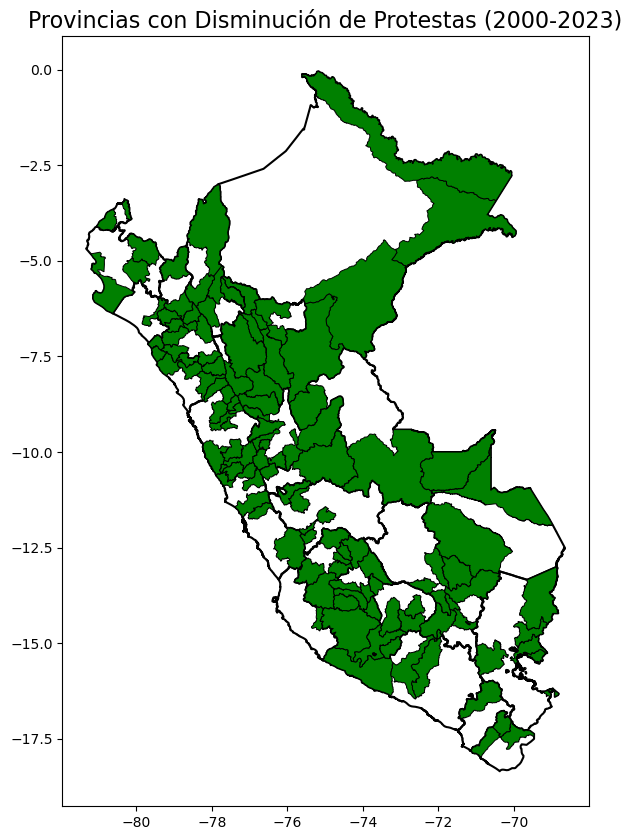

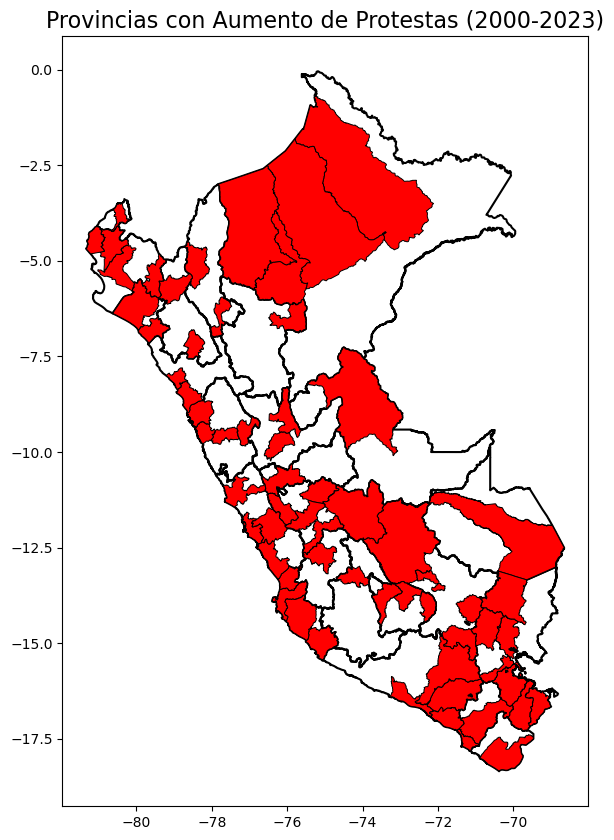

In [22]:
# Asignar el GeoDataFrame que tiene los datos
gdf_provincias = theMapAndData

columns_years = [str(year) for year in range(2000, 2024)]  # Columnas con los años
gdf_provincias['median_protests'] = gdf_provincias[columns_years].median(axis=1)

# Clasificar las provincias según si ha aumentado o disminuido la mediana
gdf_provincias['trend'] = gdf_provincias['median_protests'].apply(
    lambda x: 'increase' if x > gdf_provincias['2000'].median() else 'decrease'
)

# Visualizar el mapa de provincias con disminución de protestas
fig, ax = plt.subplots(figsize=(12, 10))
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_decrease = gdf_provincias[gdf_provincias['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='green', edgecolor='black', linewidth=0.7)
plt.title('Provincias con Disminución de Protestas (2000-2023)', fontsize=16)
plt.show()

# Visualizar el mapa de provincias con aumento de protestas
fig, ax = plt.subplots(figsize=(12, 10))
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_increase = gdf_provincias[gdf_provincias['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='red', edgecolor='black', linewidth=0.7)
plt.title('Provincias con Aumento de Protestas (2000-2023)', fontsize=16)
plt.show()